Khai báo một số thư viện cần thiết


In [1]:
from vnstock import*
import numpy as np #xử lý dữ liệu
import pandas as pd #đọc dữ liệu
import matplotlib
import matplotlib.pyplot as plt #vẽ biểu đồ
import seaborn as sb #trực quan dữ liệu
import warnings
warnings.filterwarnings('ignore') #cảnh báo và tắt các cảnh báo

In [2]:
!pip install vnstock
!pip install matplotlib
!pip install seaborn
!pip install pandas_datareader




Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Lựa chọn cổ phiếu và sử dụng vòng lặp in ra thông tin cơ bản của 4 mã cổ phiếu 

4 mã cổ phiếu bao gồm: 
- PDR - BĐS Phát Đạt
- VHM - Vinhomes
- FRT - Bán lẻ FPT
- HPG - Tập đoàn Hòa Phát

In [3]:
# Define a list of stock tickers
cyclical_stocks = ["PDR", "VHM", "FRT", "HPG"]
for equity in cyclical_stocks :
    print(company_overview(equity))


  exchange     shortName  industryID industryIDv2      industry   industryEn  \
0     HOSE  BĐS Phát Đạt         336         8633  Bất động sản  Real Estate   

  establishedYear  noEmployees  noShareholders  foreignPercent  \
0            2004          355           16087            0.03   

                      website  stockRating  deltaInWeek  deltaInMonth  \
0  https://www.phatdat.com.vn          3.7       -0.023         0.184   

   deltaInYear  outstandingShare  issueShare companyType ticker  
0       -0.592             671.6       671.6          CT    PDR  
  exchange shortName  industryID industryIDv2      industry   industryEn  \
0     HOSE  Vinhomes         336         8633  Bất động sản  Real Estate   

  establishedYear  noEmployees  noShareholders  foreignPercent  \
0            2008        11664           31513           0.243   

                  website  stockRating  deltaInWeek  deltaInMonth  \
0  https://vinhomes.vn/vi          4.2        0.054         0.055   

  

Một tệp CSV mới được mở để ghi dữ liệu vào. Với tham số 'mode='w'', tệp sẽ được mở để ghi mới, nếu tệp đã tồn tại thì nó sẽ bị ghi đè. Tham số 'encoding='utf-8'' cho phép viết các ký tự Unicode vào tệp CSV. Tham số 'newline=' giúp tránh sự khác biệt trong cách mã hóa xuống dòng trên các hệ điều hành khác nhau.

Sau đó, một đối tượng CSV writer được tạo ra để ghi dữ liệu vào tệp CSV. Đầu tiên, một hàng tiêu đề được viết vào tệp CSV để xác định các cột dữ liệu. Sau đó, vòng lặp for được sử dụng để gọi hàm "ticker_overview()" trên mỗi mã chứng khoán trong danh sách và lưu thông tin về mã chứng khoán và tổng quan vào một hàng mới trong tệp CSV bằng cách sử dụng phương thức writer.writerow()
Cuối cùng, một thông báo được in ra màn hình để thông báo rằng dữ liệu đã được lưu vào tệp CSV thành công.

In [4]:
import csv
# Open a new CSV file for writing
with open('stock_data.csv', mode='w', encoding='utf-8', newline='') as csv_file:
    # Create a CSV writer object
    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write the headers to the CSV file
    writer.writerow(['Ticker', 'Overview'])
    
    # Loop over each ticker and write the data to the CSV file
    for ticker in cyclical_stocks:
        # Retrieve the stock data using the ticker_overview() function
        data = company_overview(ticker)
        
        # Write the ticker and data to a new row in the CSV file
        writer.writerow([ticker, data])
        
# Print a message to indicate that the data has been saved
print('Stock data saved to stock_data.csv')

Stock data saved to stock_data.csv


Truy vấn lịch sử giá chứng khoán và xuất kết quả ra file

Đầu tiên là truy xuất dữ liệu lịch sử của cổ phiếu HPG, sau đó lưu vào file df_PDR.csv. Tiếp đến là đọc dữ liệu 10 dòng đầu từ file.

In [5]:
df_pdr = stock_historical_data(symbol='PDR', start_date="2021-01-01", end_date="2023-03-10")
df_pdr.to_csv('df_PDR.csv', index=False)
print(df_pdr.head(10))

                       time   open   high    low  close   volume
0 2021-01-04 07:00:00+07:00  30.72  31.44  30.42  30.96  3380200
1 2021-01-05 07:00:00+07:00  30.84  31.32  30.60  30.72  3227600
2 2021-01-06 07:00:00+07:00  30.48  31.32  30.24  31.02  3515200
3 2021-01-07 07:00:00+07:00  31.02  31.14  30.36  30.84  3148200
4 2021-01-08 07:00:00+07:00  30.60  30.90  30.18  30.72  3689700
5 2021-01-11 07:00:00+07:00  30.72  30.84  30.42  30.78  2328600
6 2021-01-12 07:00:00+07:00  30.78  30.96  30.54  30.78  3578100
7 2021-01-13 07:00:00+07:00  30.66  31.86  30.48  31.86  5038900
8 2021-01-14 07:00:00+07:00  31.80  34.07  31.74  33.47  5327500
9 2021-01-15 07:00:00+07:00  33.11  33.47  32.57  33.05  3532400


Sử dụng hàm describe để mô tả các thông số std, mean, count,... và sau đó in ra thông báo rằng file đã được lưu thành công

In [6]:
print(df_pdr.describe()) 
print('The historical data of PDR stock has been saved.')

             open        high         low       close        volume
count  543.000000  543.000000  543.000000  543.000000  5.430000e+02
mean    50.364346   51.077864   49.545396   50.452781  4.361971e+06
std     18.311875   18.533283   18.105151   18.330811  6.135881e+06
min     10.000000   10.450000    9.940000   10.100000  5.000000e+03
25%     40.495000   40.930000   39.800000   40.505000  2.533850e+06
50%     53.900000   54.500000   53.100000   53.800000  3.248300e+06
75%     65.625000   66.620000   64.340000   65.700000  4.297400e+06
max     72.630000   73.220000   71.830000   72.630000  9.409740e+07
The historical data of PDR stock has been saved.


Sau đó làm tương tự cho 3 cổ phiếu còn lại

In [7]:
df_vhm = stock_historical_data(symbol='MWG', start_date="2021-01-01", end_date="2023-03-10")
df_vhm.to_csv('df_VHM.csv', index=False)
print(df_vhm.head(10))


                       time   open   high    low  close   volume
0 2021-01-04 07:00:00+07:00  39.08  39.43  39.01  39.43  1147400
1 2021-01-05 07:00:00+07:00  39.23  40.09  39.10  39.86   967500
2 2021-01-06 07:00:00+07:00  40.21  40.21  39.46  39.66   995500
3 2021-01-07 07:00:00+07:00  39.40  39.63  39.13  39.50  1118100
4 2021-01-08 07:00:00+07:00  39.50  40.18  39.50  39.83  1277600
5 2021-01-11 07:00:00+07:00  39.89  41.32  39.89  41.26  1504500
6 2021-01-12 07:00:00+07:00  41.26  41.32  40.84  41.26  1352600
7 2021-01-13 07:00:00+07:00  41.26  41.72  41.22  41.26  1101300
8 2021-01-14 07:00:00+07:00  41.26  41.95  41.19  41.82  1433000
9 2021-01-15 07:00:00+07:00  41.85  41.95  41.62  41.79   845000


In [8]:
print(df_vhm.describe())
print('The historical data of VHM stock has been saved.')

             open        high         low       close        volume
count  543.000000  543.000000  543.000000  543.000000  5.430000e+02
mean    56.599042   57.432284   55.744236   56.647090  1.880608e+06
std     11.484002   11.596952   11.294585   11.455023  1.427312e+06
min     34.910000   37.940000   34.910000   37.340000  3.105000e+05
25%     44.960000   45.440000   44.195000   44.960000  8.954500e+05
50%     58.510000   58.930000   57.450000   58.440000  1.405600e+06
75%     66.015000   66.590000   65.355000   66.040000  2.527450e+06
max     79.220000   80.110000   78.290000   78.820000  1.084750e+07
The historical data of VHM stock has been saved.


In [9]:
df_frt = stock_historical_data(symbol='L14', start_date="2021-01-01", end_date="2023-03-10")
df_frt.to_csv('df_FRT.csv', index=False)
print(df_frt.head(10))

                       time   open   high    low  close  volume
0 2021-01-04 07:00:00+07:00  46.17  46.72  45.30  46.01   58647
1 2021-01-05 07:00:00+07:00  46.25  46.32  45.61  46.17  113724
2 2021-01-06 07:00:00+07:00  46.17  49.25  46.17  48.38  127825
3 2021-01-07 07:00:00+07:00  49.25  50.20  48.06  49.41  141093
4 2021-01-08 07:00:00+07:00  49.64  50.43  48.22  48.85  102260
5 2021-01-11 07:00:00+07:00  48.30  49.01  48.14  48.14   71302
6 2021-01-12 07:00:00+07:00  48.22  48.77  47.83  48.22   93065
7 2021-01-13 07:00:00+07:00  48.06  52.96  47.98  50.59  134129
8 2021-01-14 07:00:00+07:00  52.17  52.33  50.75  51.54   62248
9 2021-01-15 07:00:00+07:00  50.59  52.96  50.20  51.46   68555


In [10]:
print(df_frt.describe())
print('The historical data of FRT stock has been saved.')

             open        high         low       close        volume
count  543.000000  543.000000  543.000000  543.000000  5.430000e+02
mean   118.165580  122.039687  113.377182  117.447845  1.832746e+05
std     91.876055   94.808029   86.779306   90.611150  2.142059e+05
min     16.500000   19.000000   16.500000   18.300000  8.100000e+03
25%     57.750000   59.330000   56.130000   57.510000  6.438650e+04
50%     75.200000   76.520000   73.390000   74.780000  1.154000e+05
75%    142.390000  152.475000  139.825000  148.610000  2.184000e+05
max    416.520000  420.870000  344.350000  382.610000  1.921200e+06
The historical data of FRT stock has been saved.


In [11]:
df_hpg = stock_historical_data(symbol='HPG', start_date="2021-01-01", end_date="2023-03-10")
df_hpg.to_csv('df_HPG.csv', index=False)
print(df_hpg.head(10))

                       time   open   high    low  close    volume
0 2021-01-04 07:00:00+07:00  23.35  23.91  23.16  23.52  15832600
1 2021-01-05 07:00:00+07:00  23.24  23.80  23.19  23.55  18634100
2 2021-01-06 07:00:00+07:00  23.63  24.08  23.52  23.80  17948600
3 2021-01-07 07:00:00+07:00  23.99  24.02  23.49  23.80  21780700
4 2021-01-08 07:00:00+07:00  23.85  24.08  23.69  23.77  19978500
5 2021-01-11 07:00:00+07:00  23.97  24.08  23.69  23.94  16645100
6 2021-01-12 07:00:00+07:00  24.02  24.97  23.85  24.97  22738800
7 2021-01-13 07:00:00+07:00  25.13  25.27  24.69  24.86  16131800
8 2021-01-14 07:00:00+07:00  24.86  24.86  24.38  24.72  17527000
9 2021-01-15 07:00:00+07:00  24.63  25.05  24.63  24.74  14788300


In [12]:
print(df_hpg.describe())
print('The historical data of HPG stock has been saved.')

             open        high         low       close        volume
count  543.000000  543.000000  543.000000  543.000000  5.430000e+02
mean    29.184586   29.620902   28.738103   29.135175  2.547503e+07
std      8.088171    8.120207    8.041315    8.064865  1.212561e+07
min     12.000000   12.450000   11.800000   12.100000  6.926200e+06
25%     22.325000   22.650000   21.950000   22.300000  1.707370e+07
50%     28.530000   28.910000   27.750000   28.490000  2.295190e+07
75%     35.930000   36.310000   35.420000   35.800000  3.013125e+07
max     43.900000   44.200000   43.520000   43.900000  9.965880e+07
The historical data of HPG stock has been saved.


Hiển thị và so sánh thông tin giao dịch của các mã chứng khoán đã chọn

In [13]:
price_board('PDR,VHM,FRT,HPG')


,Mã CP,Giá Khớp Lệnh,KLBD/TB5D,T.độ GD,KLGD ròng(CM),%KLGD ròng (CM),RSI,MACD Volume,MACD Signal,Tín hiệu KT,...,Khối lượng Dư mua,Khối lượng Dư bán,Khớp nhiều nhất,seq,vnid3d,vnid1m,vnid3m,vnid1y,vnipe,vnipb
0,PDR,21400.0,0.58,0.53,113500,20.0,66.779538,0.03,Neutral,Sell,...,192400,542700,21400,1690963140,0.8,8.7,16.1,0.9,15.1518,1.73184
1,VHM,62500.0,0.79,1.71,-72500,-17.9,69.115872,0.47,Buy,Neutral,...,70800,58500,62200,1690963140,0.8,8.7,16.1,0.9,15.1518,1.73184
2,FRT,76400.0,0.60,1.10,-35500,-30.1,60.302570,-0.69,Sell,Neutral,...,84100,36500,76000,1690963140,0.8,8.7,16.1,0.9,15.1518,1.73184
3,HPG,27500.0,0.66,1.63,-274800,-10.5,57.016329,-0.20,Sell,Neutral,...,1879000,465900,27500,1690963140,0.8,8.7,16.1,0.9,15.1518,1.73184


Tiếp theo là hiển thị 3 loại báo cáo tài chính cơ bản của 1 doanh nghiệp. Đầu tiên là bảng cân đối kế toán (Balance sheet)

import thư viện vnstock.financial_flow để hiển thị các loại báo cáo tài chính và tạo một DataFrame trống từ nhóm cổ phiếu ban đầu

In [14]:
from vnstock import financial_flow
# Danh sách các cổ phiếu thuộc nhóm cổ phiếu chu kỳ
cyclical_stocks = ["PDR", "VHM", "FRT", "HPG"]

# Tạo DataFrame trống
df = pd.DataFrame()


Sử dụng vòng lặp for để gọi hàm financial_flow() trên mỗi mã chứng khoán trong danh sách và lưu thông tin về balance sheet của từng cổ phiếu vào đối tượng DataFrame trống ban đầu.

In [15]:
# Gọi hàm financial_flow với các tham số mong muốn
for symbol in cyclical_stocks:
    df_BS = financial_flow(symbol=symbol, report_type='balancesheet', report_range='quarterly')
    df_BS['Symbol'] = symbol
    df = pd.concat([df, df_BS], axis=0)
# In ra bảng balance sheet của các cổ phiếu
for symbol in cyclical_stocks:
    print(f"--- {symbol} ---")
    print(df[df['Symbol']==symbol])

--- PDR ---
        ticker  shortAsset  cash  shortInvest  shortReceivable  inventory  \
index                                                                       
2023-Q2    PDR       16554   214           15             4073      12171   
2023-Q1    PDR       17045   218           15             4597      12132   
2022-Q4    PDR       18218   262            9             5650      12131   
2022-Q3    PDR       21299    51           22             7615      13378   
2022-Q2    PDR       19287   599           22             5383      13107   
2022-Q1    PDR       16079   350           22             3369      12225   
2021-Q4    PDR       15337   494           22             2533      12192   
2021-Q3    PDR       15416   290           24             3120      11921   
2021-Q2    PDR       14620   297           24             2228      12017   
2021-Q1    PDR       13243     8           12             2537      10632   
2020-Q4    PDR       10915    53           12             1525  

Sử dụng vòng lặp for để lưu thông tin balance sheet của từng mã chứng khoán thành các tệp CSV tương ứng với tên của từng mã chứng khoán. Tên tệp CSV được đặt theo dạng "{symbol}_financial_statements1.csv".

In [16]:

for symbol in cyclical_stocks:
    symbol_df = df[df['Symbol'] == symbol]
    symbol_df.to_csv(f"{symbol}_financial_statements1.csv", index=False)



Thực hiện tương tự cho 2 báo cáo tài chính còn lại bao gồm báo cáo lưu chuyển tiền tệ (Cash Flow Statement) và báo cáo kết quả kinh doanh (Income Statement)

In [17]:

from vnstock import financial_flow

# Danh sách các cổ phiếu thuộc nhóm cổ phiếu chu kỳ
cyclical_stocks = ["PDR", "VHM", "FRT", "HPG"]

# Tạo DataFrame trống
df = pd.DataFrame()

# Gọi hàm financial_flow với các tham số mong muốn
for symbol in cyclical_stocks:
    df_CF = financial_flow(symbol=symbol, report_type='cashflow', report_range='quarterly')
    df_CF['Symbol'] = symbol
    df = pd.concat([df, df_CF], axis=0)

# In ra bảng balance sheet của các cổ phiếu
for symbol in cyclical_stocks:
    print(f"--- {symbol} ---")
    print(df[df['Symbol']==symbol])
    
for symbol in cyclical_stocks:
    symbol_df = df[df['Symbol'] == symbol]
    symbol_df.to_csv(f"{symbol}_financial_statements2.csv", index=False)




--- PDR ---
        ticker  investCost  fromInvest  fromFinancial  fromSale  freeCashFlow  \
index                                                                           
2023-Q2    PDR          -8          -9            400      -395         885.0   
2023-Q1    PDR          -2          -9           -966       931         -68.0   
2022-Q4    PDR         -34         547           -826       490        5071.0   
2022-Q3    PDR          -5         812            398     -1758        3689.0   
2022-Q2    PDR         -24        1760              5     -1516        4064.0   
2022-Q1    PDR         -18        -534           1384      -994        3097.0   
2021-Q4    PDR          -9       -1337           1397       144        2740.0   
2021-Q3    PDR         -14        -427            482       -62        2420.0   
2021-Q2    PDR          -2        -748            158       879         480.0   
2021-Q1    PDR         -19        -241            278       -82        1643.0   
2020-Q4    PDR  

In [18]:
from vnstock import financial_flow

# Danh sách các cổ phiếu thuộc nhóm cổ phiếu chu kỳ
cyclical_stocks = ["PDR", "VHM", "FRT", "HPG"]

# Tạo DataFrame trống
df = pd.DataFrame()

# Gọi hàm financial_flow với các tham số mong muốn
for symbol in cyclical_stocks:
    df_IS = financial_flow(symbol=symbol, report_type='incomestatement', report_range='quarterly')
    df_IS['Symbol'] = symbol
    df = pd.concat([df, df_IS], axis=0)

# In ra bảng balance sheet của các cổ phiếu
for symbol in cyclical_stocks:
    print(f"--- {symbol} ---")
    print(df[df['Symbol']==symbol])

for symbol in cyclical_stocks:
    symbol_df = df[df['Symbol'] == symbol]
    symbol_df.to_csv(f"{symbol}_financial_statements3.csv", index=False)


    




--- PDR ---
        ticker  revenue  yearRevenueGrowth  quarterRevenueGrowth  \
index                                                              
2023-Q2    PDR        5             -0.994                -0.973   
2023-Q1    PDR      192             -0.693                12.138   
2022-Q4    PDR       15             -0.988                 0.317   
2022-Q3    PDR       11             -0.991                -0.987   
2022-Q2    PDR      853              0.587                 0.364   
2022-Q1    PDR      625              0.067                -0.491   
2021-Q4    PDR     1229             -0.130                -0.031   
2021-Q3    PDR     1268             -0.037                 1.357   
2021-Q2    PDR      538             -0.027                -0.083   
2021-Q1    PDR      586             -0.069                -0.585   
2020-Q4    PDR     1412              0.363                 0.073   
2020-Q3    PDR     1316              2.325                 1.382   
2020-Q2    PDR      552             

Sử dụng vòng lặp for để hiển thị các chỉ số tài chính của 4 mã cổ phiếu và sau đó lưu vào file 

In [19]:
import pandas as pd
from vnstock import*
# Define the list of stocks to retrieve financial ratios for
cyclical_stocks = ['PDR', 'VHM', 'FRT', 'HPG']

# Create a dictionary to store the financial ratios for each stock
financial_ratios = {}

# Loop through each stock
for stock in cyclical_stocks:
    # Call the financial_ratio function for the current stock
    corporate_ratios = financial_ratio(symbol=stock, report_range='yearly', is_all='true')
    # Convert the financial ratios data to a pandas dataframe
    ratios_df = pd.DataFrame.from_dict(corporate_ratios)
    # Add the dataframe to the dictionary
    financial_ratios[stock] = ratios_df

# Print the financial ratios for each stock
for stock, ratios_df in financial_ratios.items():
    print(f"Financial Ratios for {stock}:")
    print(ratios_df)
    # Save the dataframe to a CSV file
    ratios_df.to_csv(f"{stock}_financial_ratios.csv", index=False)  #index=False is used to prevent the index column of the dataframe from being saved to the CSV file.
    # Print a message indicating that the data has been saved
    print(f"Financial ratios for {stock} have been saved to {stock}_financial_ratios.csv")

Financial Ratios for PDR:
  ticker  quarter  year  priceToEarning  priceToBook  valueBeforeEbitda  \
0    PDR        5  2022             8.0          1.1               16.5   
1    PDR        5  2021            25.2          6.7               18.2   
2    PDR        5  2020            16.9          4.0               23.6   
3    PDR        5  2019             9.9          2.0                9.0   
4    PDR        5  2018            10.1          1.9               15.1   

   dividend    roe    roa  daysReceivable  ...  loanOnAsset  loanOnDeposit  \
0       NaN  0.150  0.052            1673  ...         None           None   
1       NaN  0.307  0.103             663  ...         None           None   
2       NaN  0.260  0.083             645  ...         None           None   
3     0.068  0.226  0.070              90  ...         None           None   
4       NaN  0.205  0.061              95  ...         None           None   

   depositOnEarnAsset  badDebtOnAsset  liquidityOnLiab

 Data Visualization: vẽ biểu đồ hiển thị lịch sử giá của các mã chứng khoán đã chọn từ ngày 2021-01-01 đến ngày 2023-03-10

Với 4 mã cổ phiếu, nhóm lựa chọn mỗi mã cổ phiếu sẽ hiển thị 4 biểu đồ thể hiện lịch sử giá của các mã cổ phiếu

Trực quan hóa dữ liệu lịch sử giá của cổ phiếu PDR

Đầu tiên sử dụng thư viện seaborn để vẽ biểu đồ phân phối của các thuộc tính ('Open', 'High', 'Low', 'Close', 'Volume') của cổ phiếu PDR.



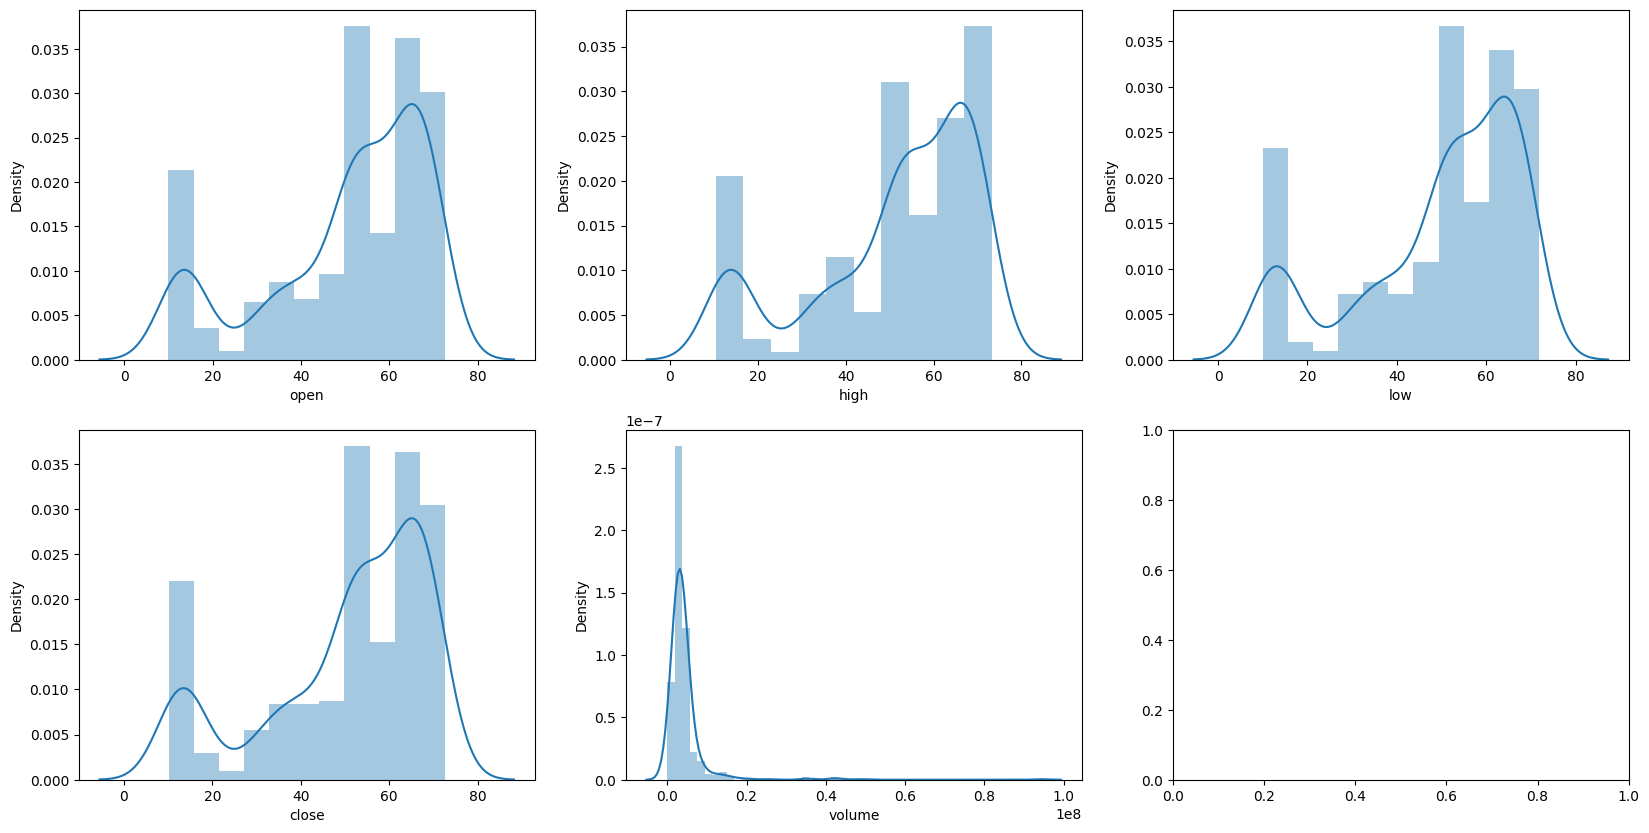

In [20]:

# Define the attributes to plot
attributes = ['open', 'high', 'low', 'close', 'volume']

# Set the figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# Plot the distribution of each attribute on a separate subplot
for i, attr in enumerate(attributes):
    row = i // 3  # Calculate the row number
    col = i % 3   # Calculate the column number
    sb.distplot(df_pdr[attr], ax=axes[row, col])  # Plot the distribution on the corresponding subplot

# Show the plot
plt.show()


Sử dụng thư viện matplotlib để tạo ra 6 đồ thị con (subplots) tương ứng với các thuộc tính "Open", "High", "Low", "Close", "Volume" của cổ phiếu PDR. 

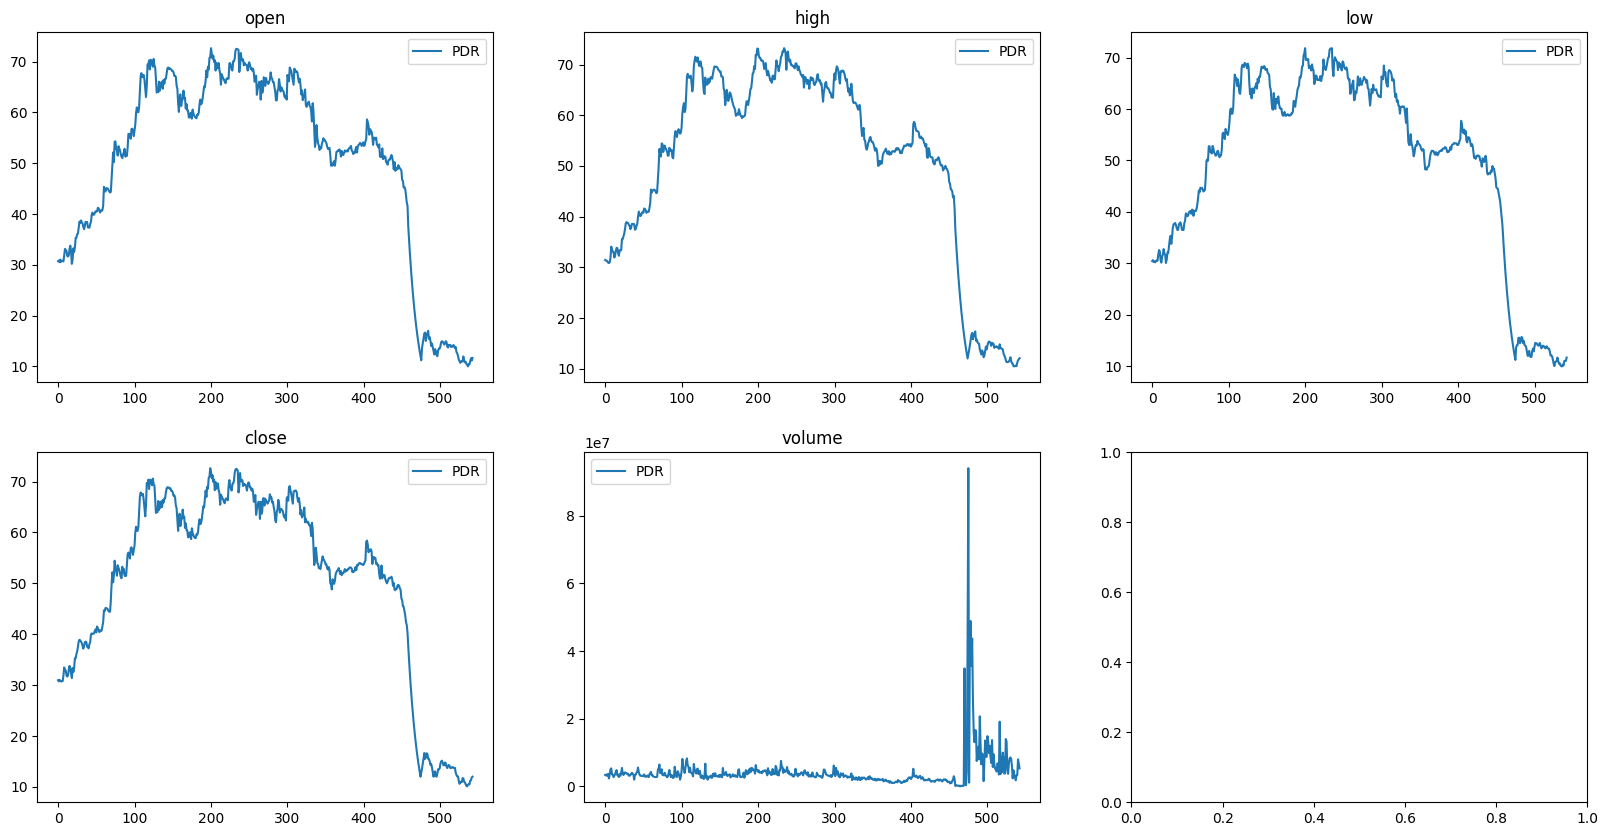

In [21]:
import matplotlib.pyplot as plt

#Create a subplot for each attribute (Open, High, Low, Close, Volume)
fig, axs = plt.subplots(2, 3, figsize=(20,10))

#Loop through each attribute and plot the historical prices for PDR
for i, attribute in enumerate(['open', 'high', 'low', 'close', 'volume']):
    row = i // 3
    col = i % 3
    axs[row, col].set_title(attribute)
    axs[row, col].plot(df_pdr[attribute], label='PDR')
    axs[row, col].legend()

plt.show()


vẽ biểu đồ boxplot cho cổ phiếu PDR bằng thư viện seaborn trong Python. 

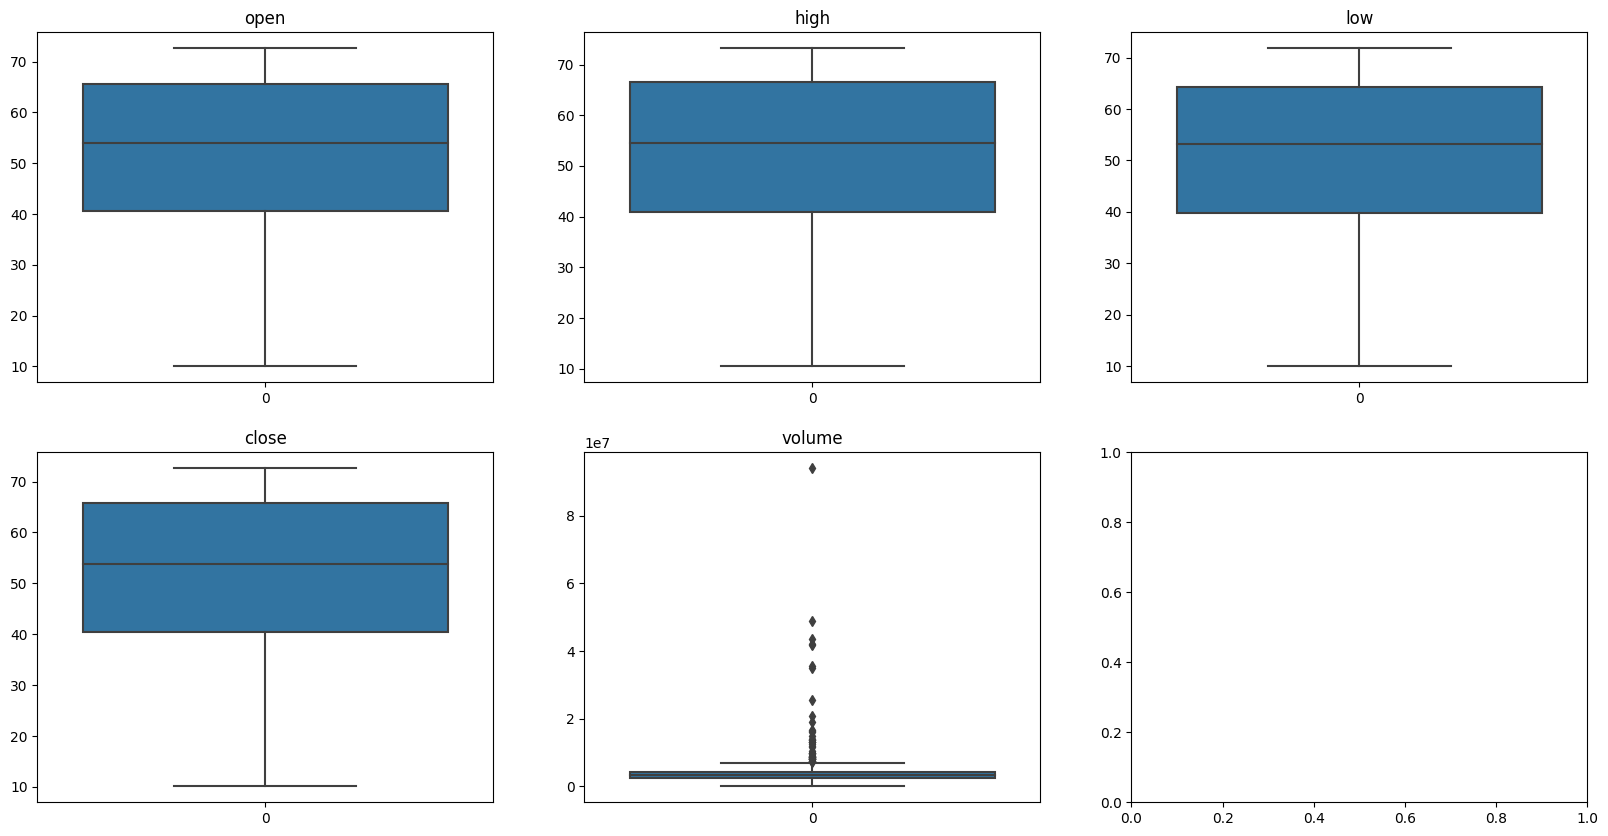

In [22]:
#Biểu đồ boxplot của PDR
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb

# Define the list of attributes
attributes = ['open', 'high', 'low', 'close', 'volume']
# Create subplots for each attribute
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each attribute and plot the boxplot for PDR stock data
for i, attribute in enumerate(attributes):
    row = i // 3  #Calculate the row number
    col = i % 3   # Calculate the column number
    sb.boxplot(df_pdr[attribute], ax=axs[row, col])   # Plot the distribution on the corresponding subplot
    axs[row, col].set_title(attribute)

plt.show()


Thư viện Seaborn để tạo một Pair Grid của dữ liệu trong DataFrame để hiển thị đồ thị liên quan giữa các cặp biến (pair-wise relationships) trong một bộ dữ liệu. Trong đó map_upper() được sử dụng để vẽ scatter plot (điểm biểu diễn mối tương quan giữa hai biến) cho phần trên đường chéo chính của Pair Grid. map_lower() được sử dụng để vẽ Kernel Density Estimate (KDE) plot (biểu diễn mật độ xác suất ước lượng dựa trên dữ liệu) cho phần dưới đường chéo chính của Pair Grid. Cuối cùng, map_diag() được sử dụng để vẽ histogram (biểu diễn phân bố tần suất của một biến) cho đường chéo chính của Pair Grid.

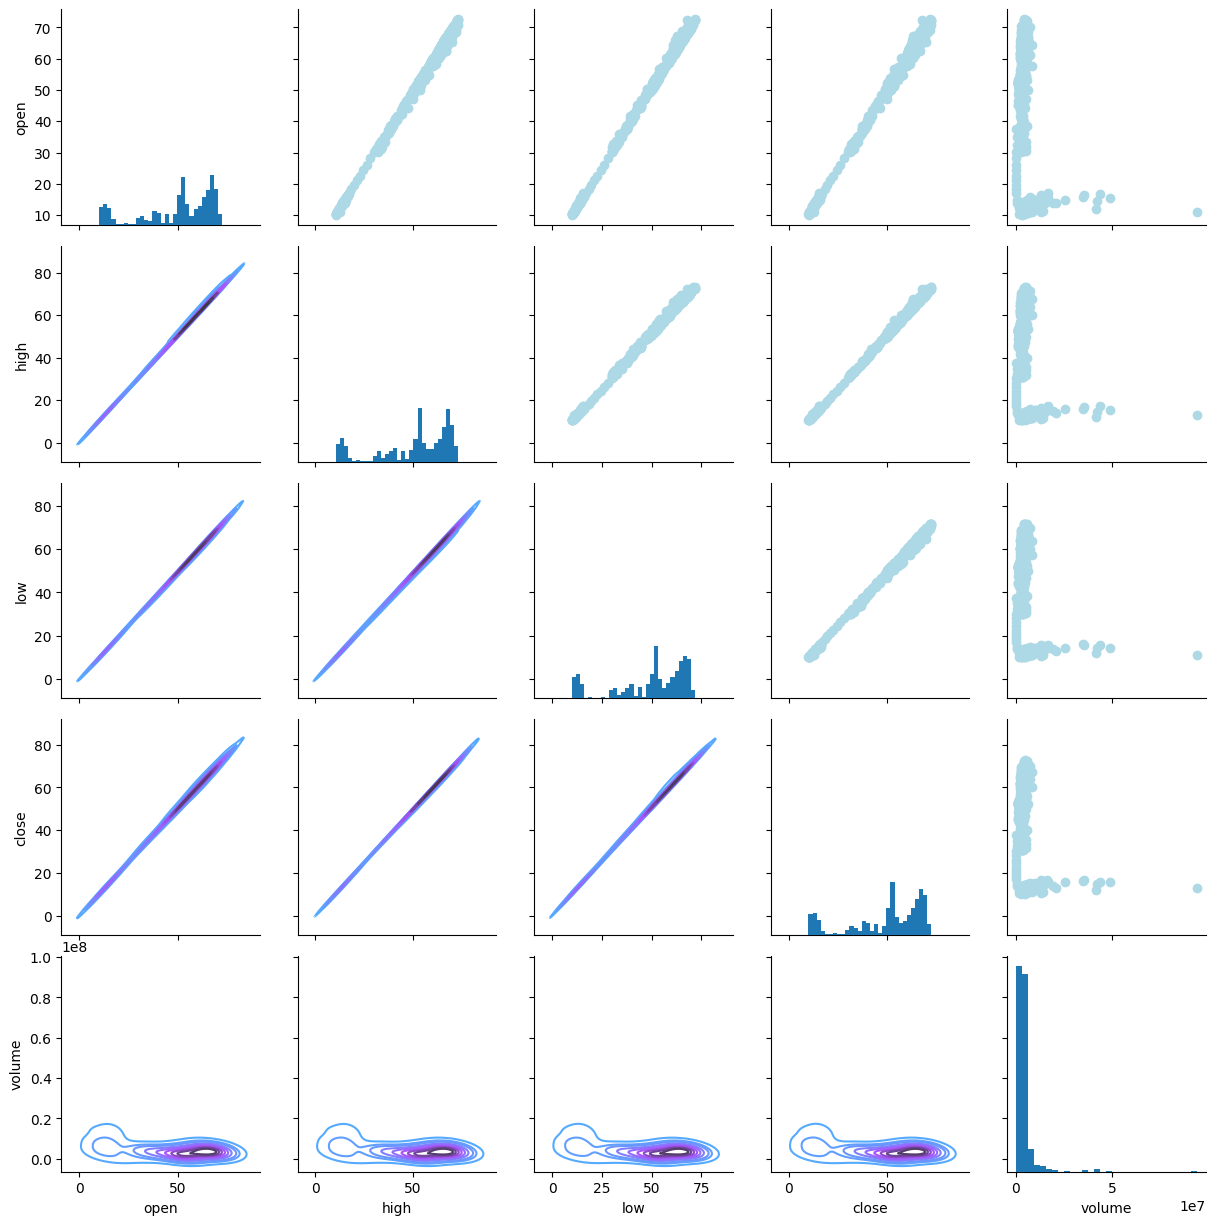

In [23]:
import seaborn as sns
# Create a pair grid of the data using Seaborn
df_plot=sns.PairGrid(df_pdr.dropna())
df_plot.map_upper(plt.scatter, color='lightblue')
df_plot.map_lower(sns.kdeplot, cmap='cool_d')
df_plot.map_diag(plt.hist, bins=30)

Tương tự là 4 biểu đồ minh họa các thuộc tính của cổ phiếu VHM

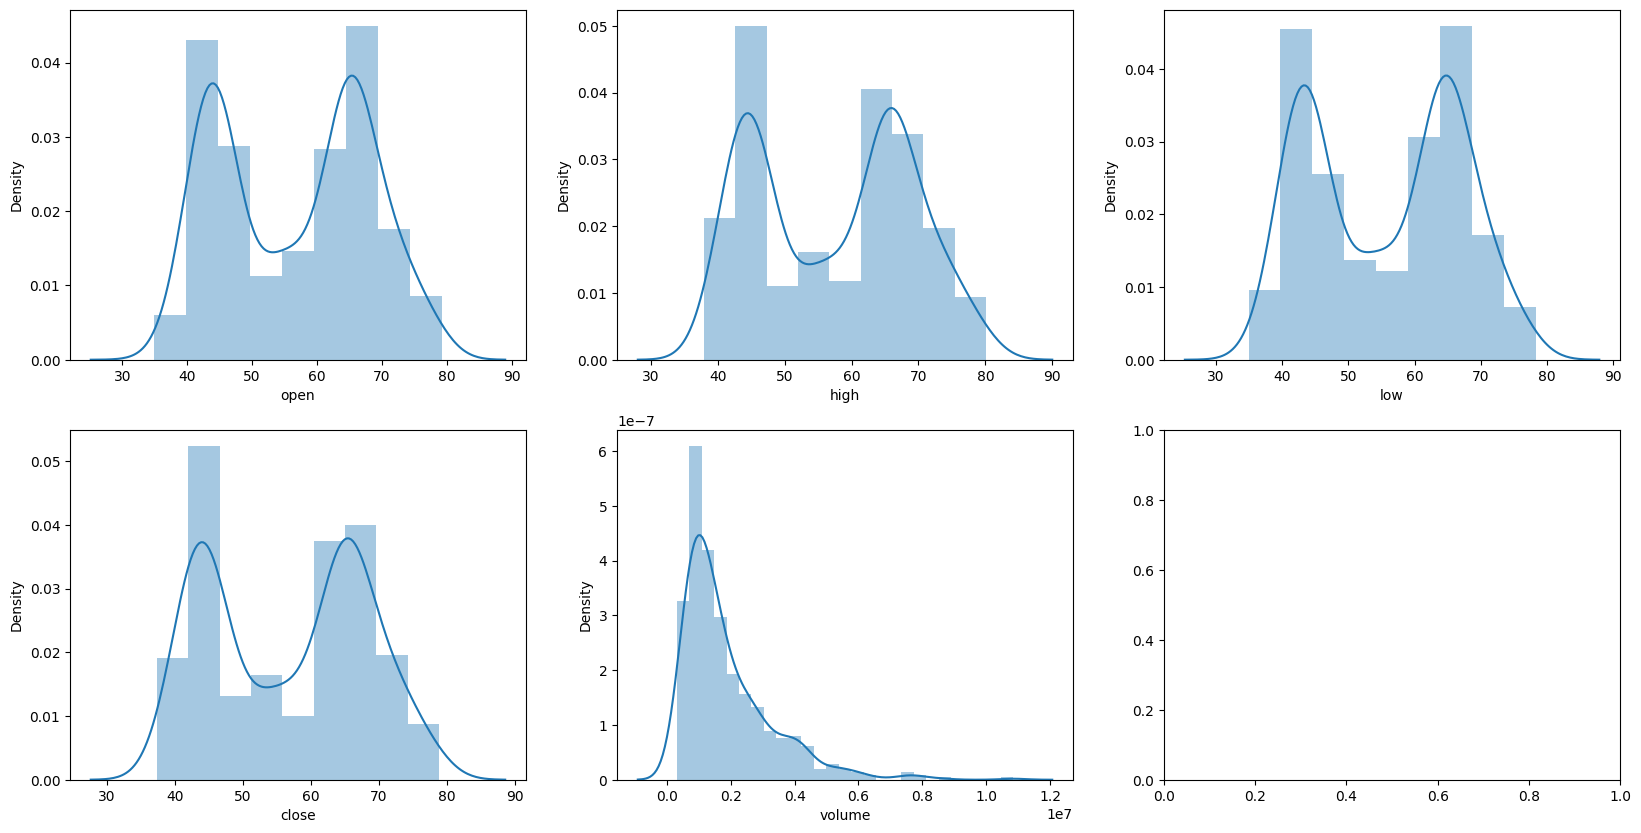

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define the attributes to plot
attributes = ['open', 'high', 'low', 'close', 'volume']

# Set the figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# Plot the distribution of each attribute on a separate subplot
for i, attr in enumerate(attributes):
    row = i // 3  # Calculate the row number
    col = i % 3   # Calculate the column number
    sb.distplot(df_vhm[attr], ax=axes[row, col])  # Plot the distribution on the corresponding subplot

# Show the plot
plt.show()

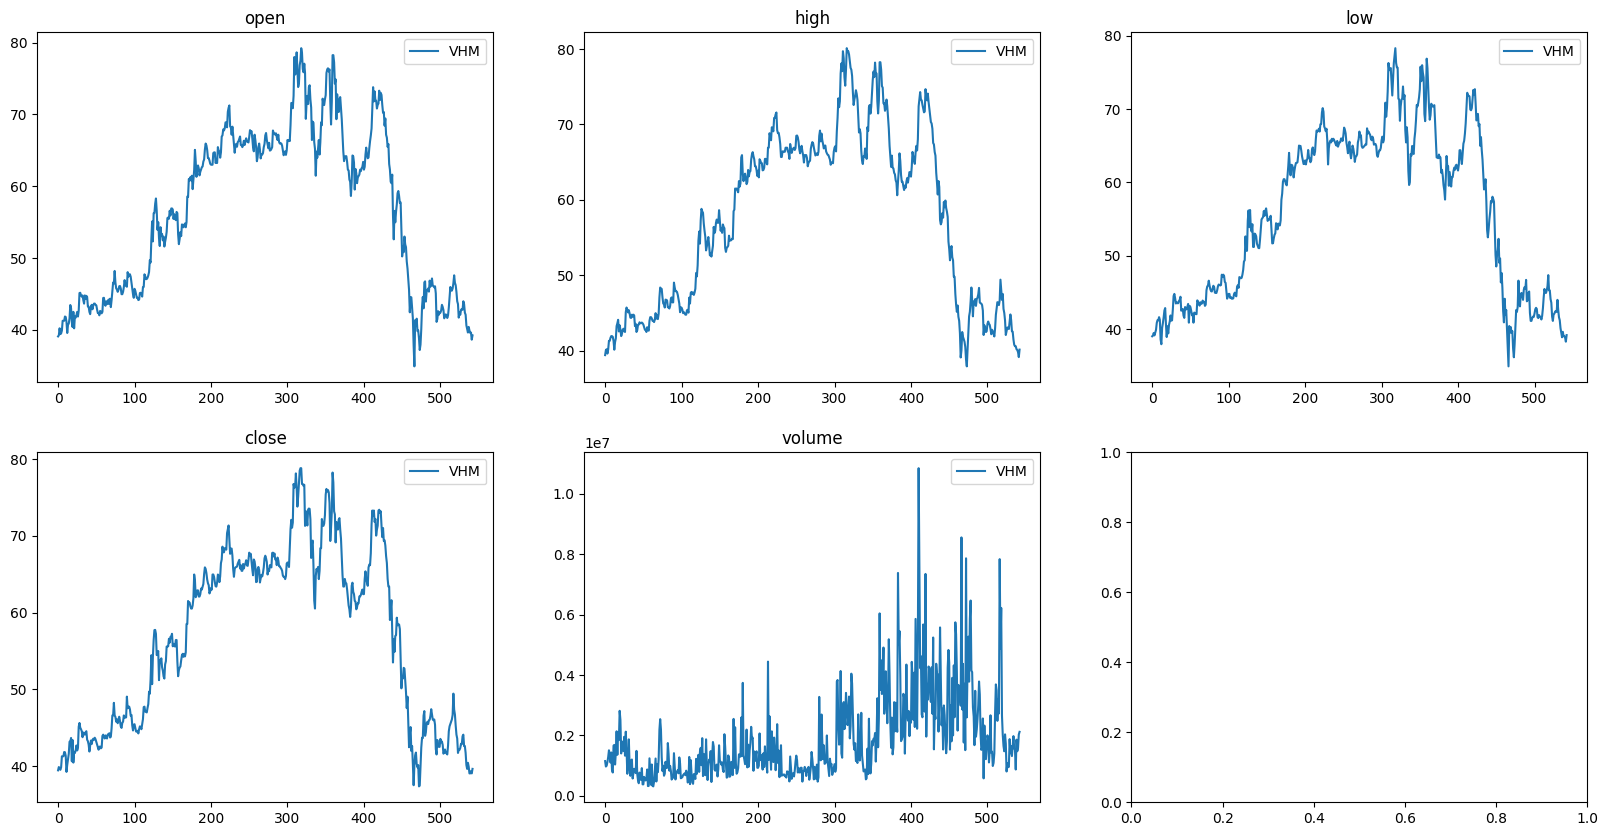

In [25]:
import matplotlib.pyplot as plt

#Create a subplot for each attribute (Open, High, Low, Close, Volume)
fig, axs = plt.subplots(2, 3, figsize=(20,10))

#Loop through each attribute and plot the historical prices for PDR
for i, attribute in enumerate(['open', 'high', 'low', 'close', 'volume']):
    row = i // 3
    col = i % 3
    axs[row, col].set_title(attribute)
    axs[row, col].plot(df_vhm[attribute], label='VHM')
    axs[row, col].legend()

plt.show()


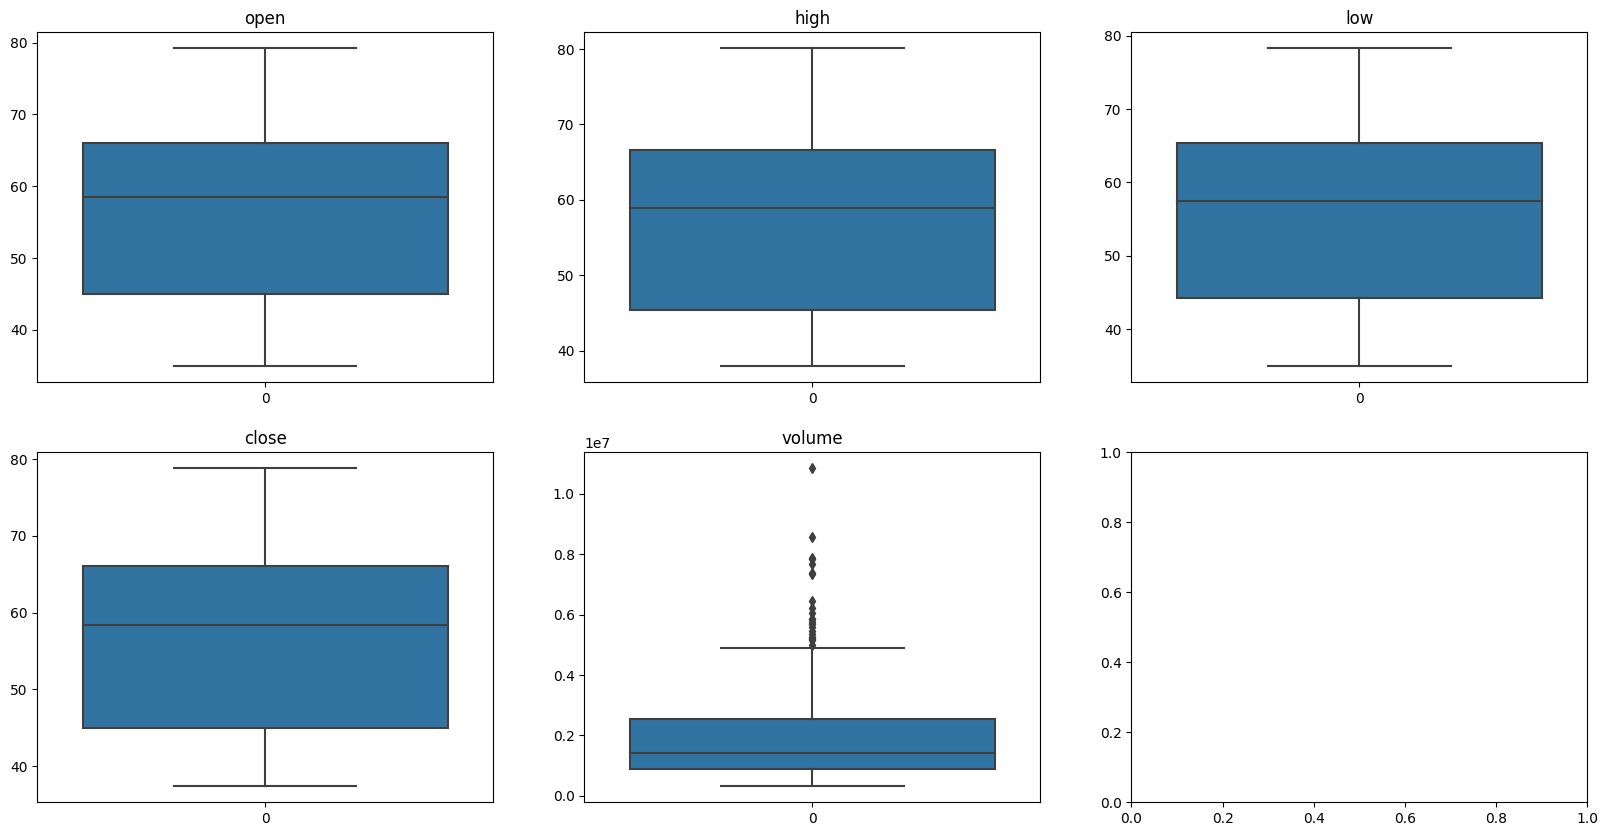

In [26]:
#Biểu đồ boxplot của VHM
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb

# Define the list of attributes
attributes = ['open', 'high', 'low', 'close', 'volume']

# Create subplots for each attribute
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each attribute and plot the boxplot for PDR stock data
for i, attribute in enumerate(attributes):
    row = i // 3  #Calculate the row number
    col = i % 3   # Calculate the column number
    sb.boxplot(df_vhm[attribute], ax=axs[row, col])   # Plot the distribution on the corresponding subplot
    axs[row, col].set_title(attribute)

plt.show()


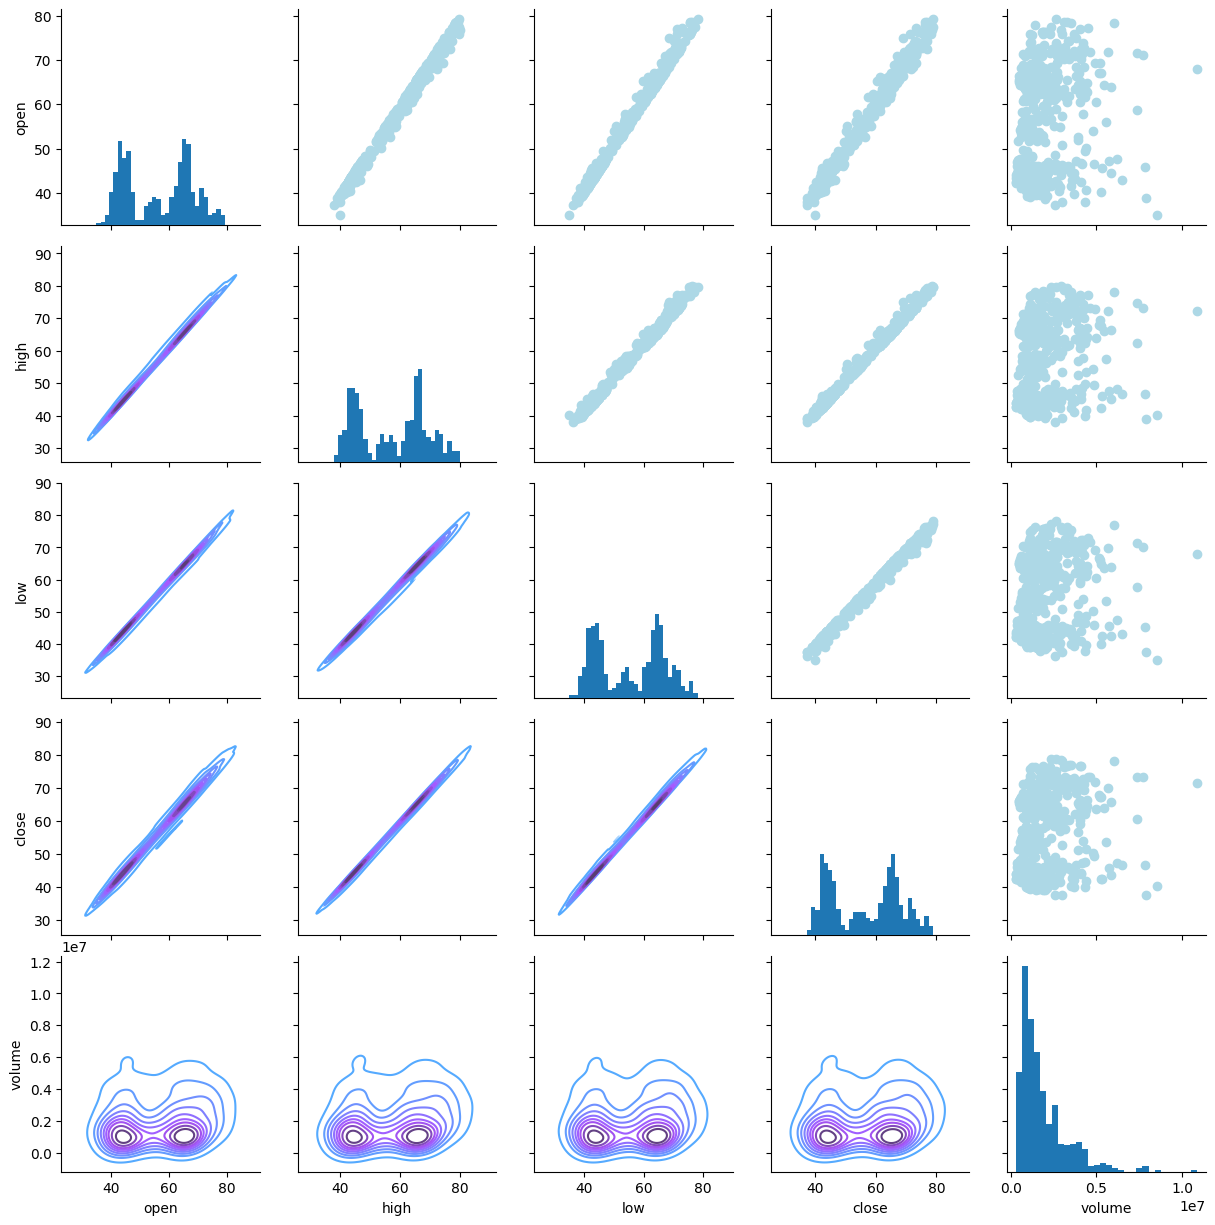

In [27]:
import seaborn as sns
# Create a pair grid of the data using Seaborn
df_plot=sns.PairGrid(df_vhm.dropna())
df_plot.map_upper(plt.scatter, color='lightblue')
df_plot.map_lower(sns.kdeplot, cmap='cool_d')
df_plot.map_diag(plt.hist, bins=30)

Tiếp đến là biểu đồ minh họa của FRT

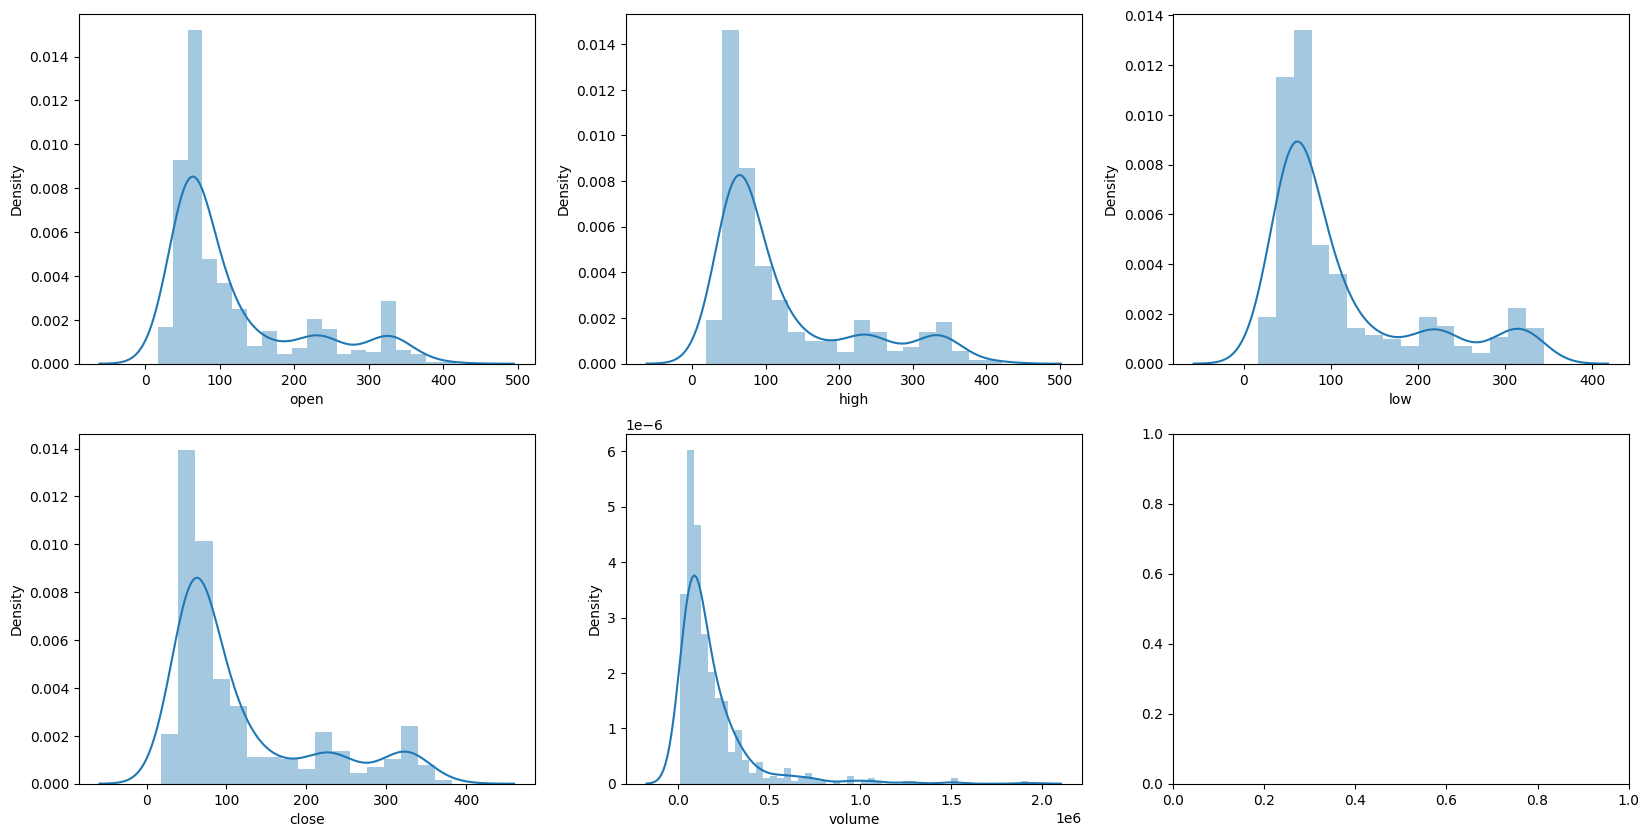

In [28]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define the attributes to plot
attributes = ['open', 'high', 'low', 'close', 'volume']

# Set the figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# Plot the distribution of each attribute on a separate subplot
for i, attr in enumerate(attributes):
    row = i // 3  # Calculate the row number
    col = i % 3   # Calculate the column number
    sb.distplot(df_frt[attr], ax=axes[row, col])  # Plot the distribution on the corresponding subplot

# Show the plot
plt.show()


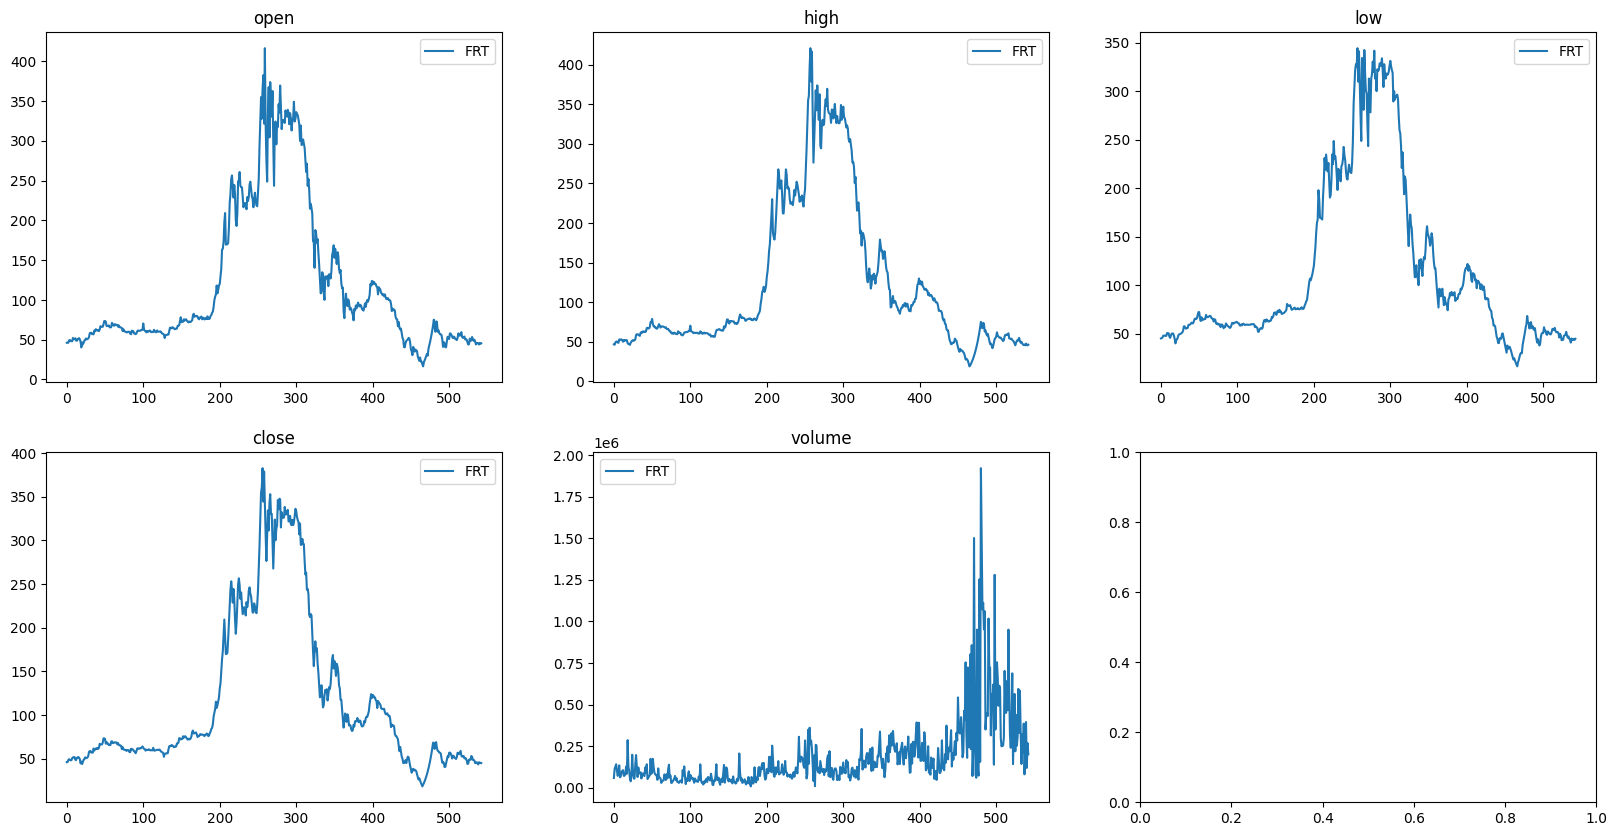

In [29]:
import matplotlib.pyplot as plt

#Create a subplot for each attribute (Open, High, Low, Close, Volume)
fig, axs = plt.subplots(2, 3, figsize=(20,10))

#Loop through each attribute and plot the historical prices for PDR
for i, attribute in enumerate(['open', 'high', 'low', 'close', 'volume']):
    row = i // 3
    col = i % 3
    axs[row, col].set_title(attribute)
    axs[row, col].plot(df_frt[attribute], label='FRT')
    axs[row, col].legend()

plt.show()


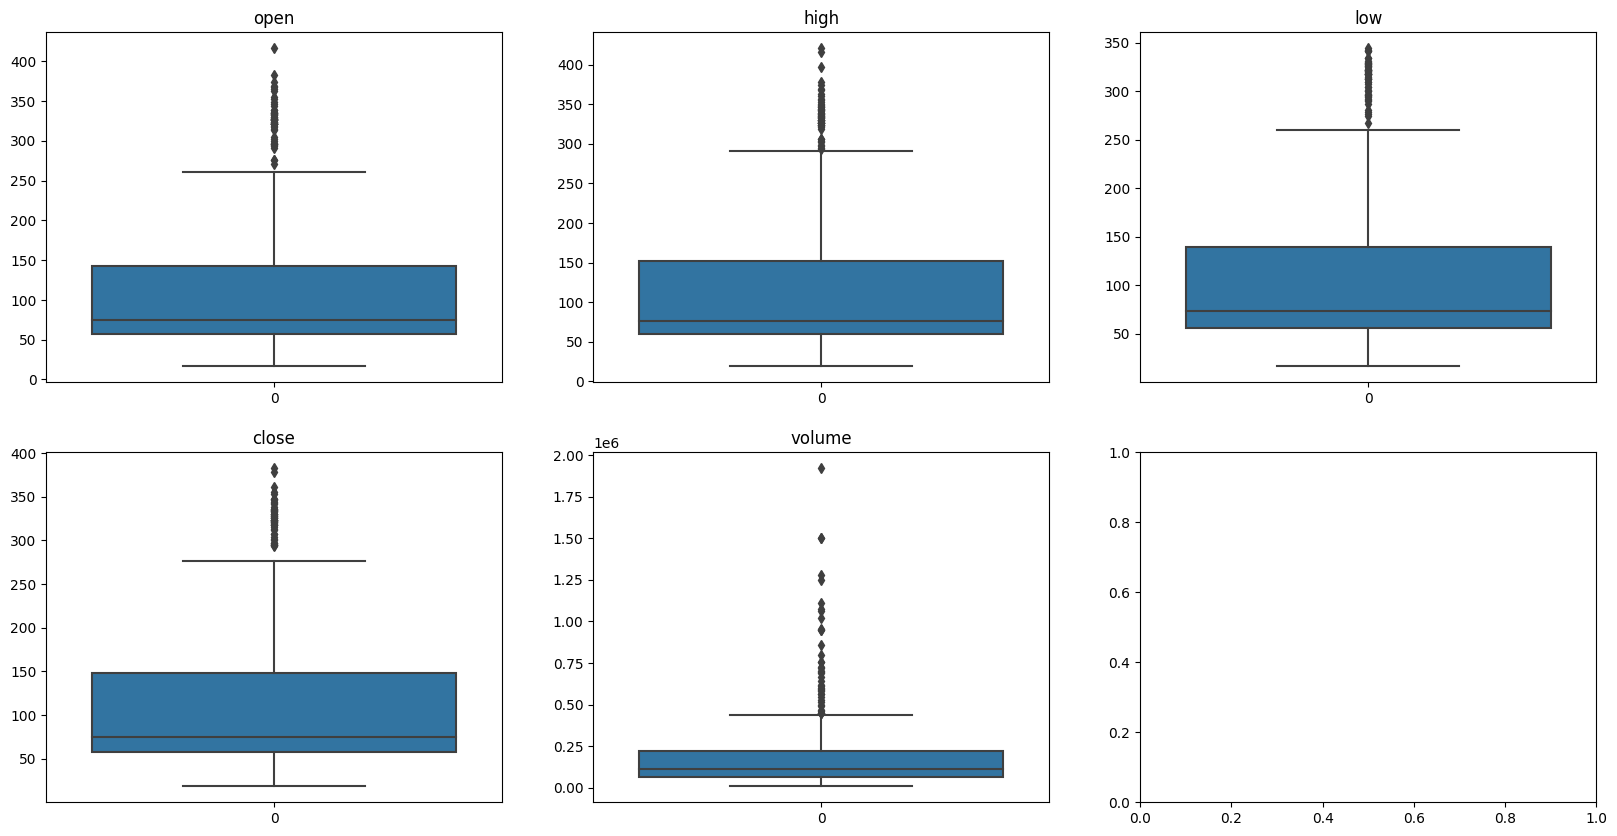

In [30]:
#Biểu đồ boxplot của FRT
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb

# Define the list of attributes
attributes = ['open', 'high', 'low', 'close', 'volume']
# Create subplots for each attribute
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each attribute and plot the boxplot for PDR stock data
for i, attribute in enumerate(attributes):
    row = i // 3  #Calculate the row number
    col = i % 3   # Calculate the column number
    sb.boxplot(df_frt[attribute], ax=axs[row, col])   # Plot the distribution on the corresponding subplot
    axs[row, col].set_title(attribute)

plt.show()

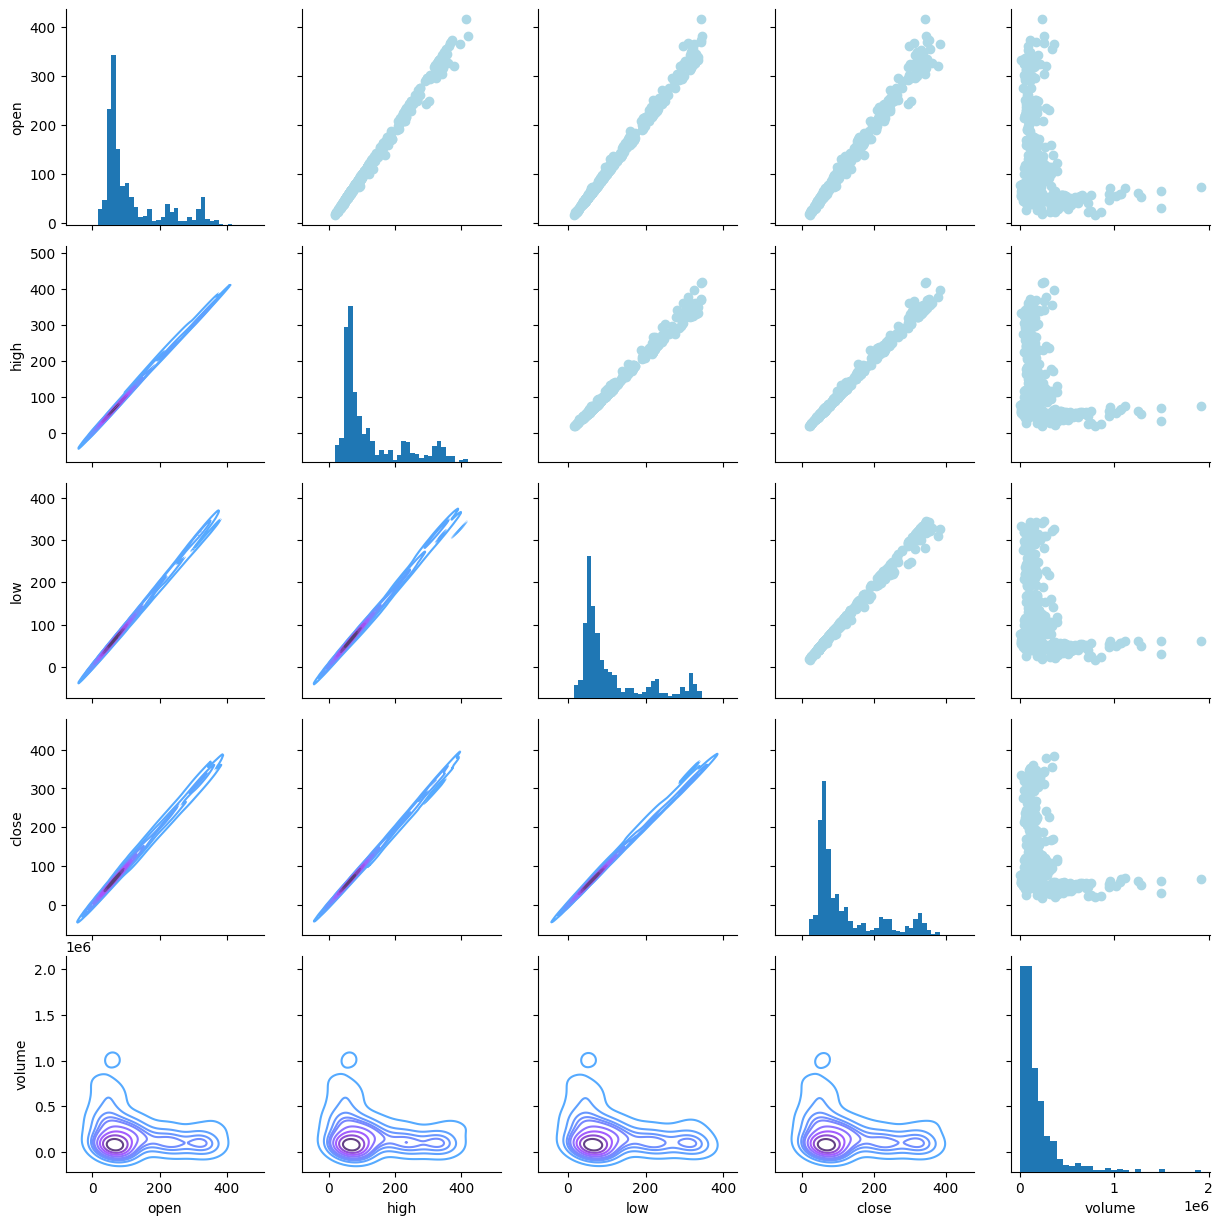

In [31]:
import seaborn as sns
# Create a pair grid of the data using Seaborn
df_plot=sns.PairGrid(df_frt.dropna())
df_plot.map_upper(plt.scatter, color='lightblue')
df_plot.map_lower(sns.kdeplot, cmap='cool_d')
df_plot.map_diag(plt.hist, bins=30)

Và cuối cùng là biểu đồ minh họa cho cổ phiếu HPG

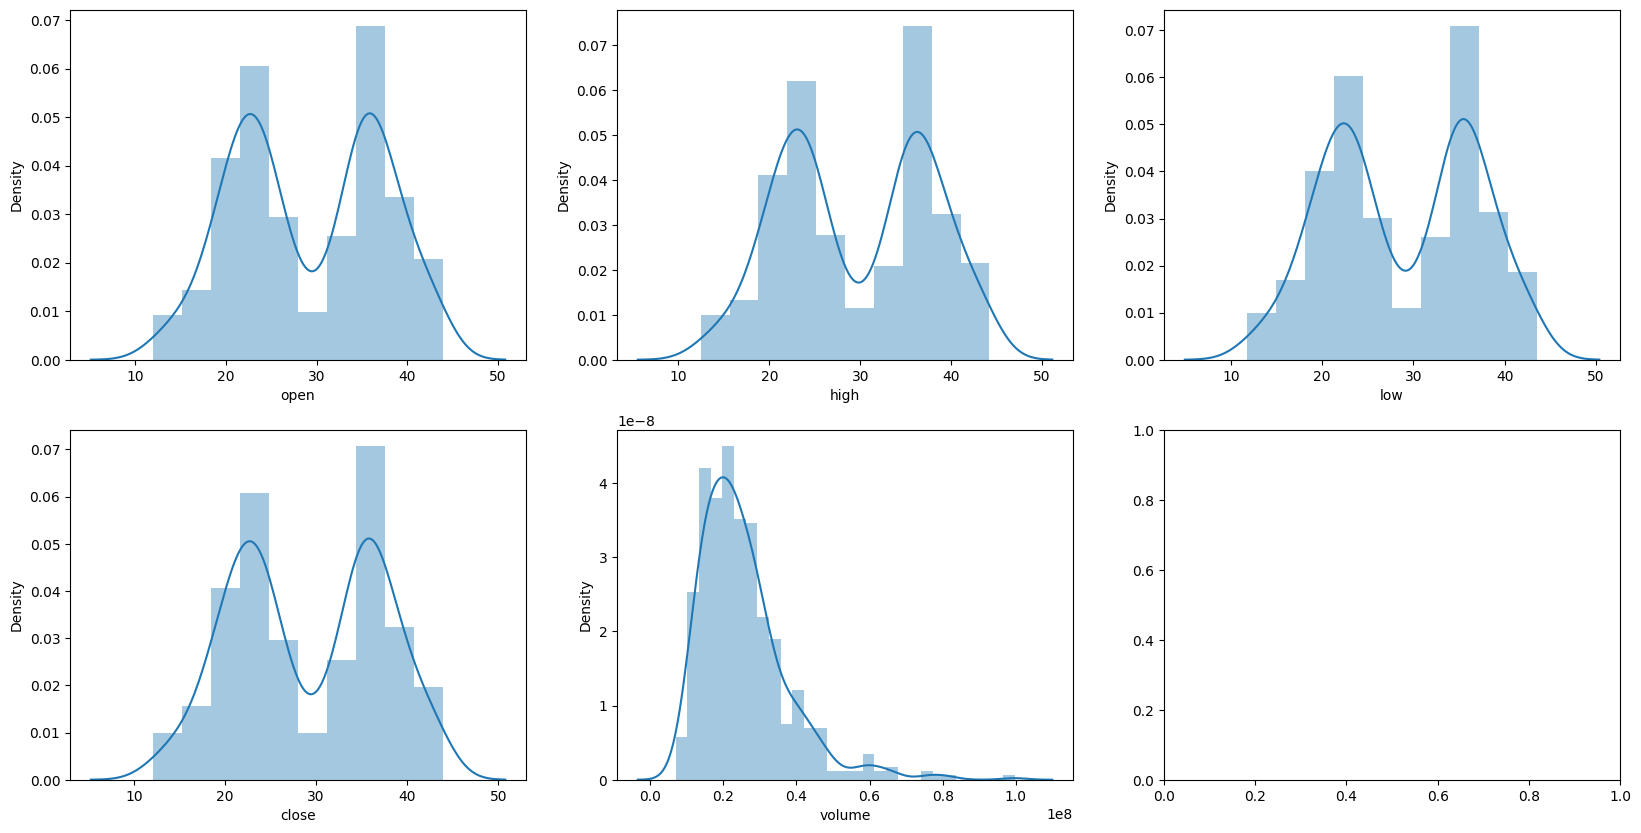

In [32]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define the attributes to plot
attributes = ['open', 'high', 'low', 'close', 'volume']

# Set the figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# Plot the distribution of each attribute on a separate subplot
for i, attr in enumerate(attributes):
    row = i // 3  # Calculate the row number
    col = i % 3   # Calculate the column number
    sb.distplot(df_hpg[attr], ax=axes[row, col])  # Plot the distribution on the corresponding subplot

# Show the plot
plt.show()


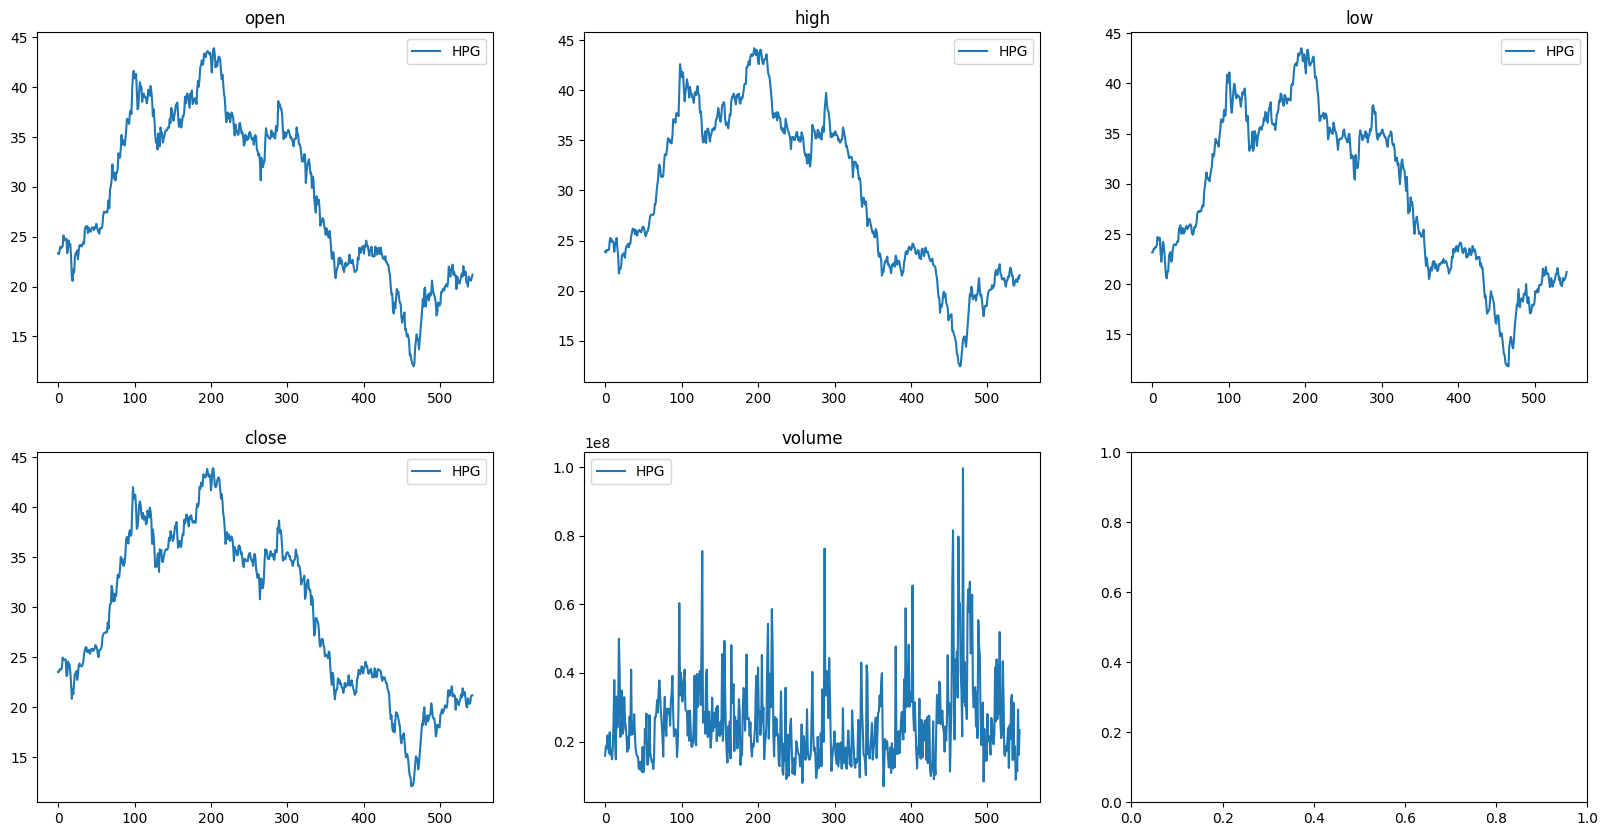

In [33]:
import matplotlib.pyplot as plt

#Create a subplot for each attribute (Open, High, Low, Close, Volume)
fig, axs = plt.subplots(2, 3, figsize=(20,10))

#Loop through each attribute and plot the historical prices for PDR
for i, attribute in enumerate(['open', 'high', 'low', 'close', 'volume']):
    row = i // 3
    col = i % 3
    axs[row, col].set_title(attribute)
    axs[row, col].plot(df_hpg[attribute], label='HPG')
    axs[row, col].legend()

plt.show()


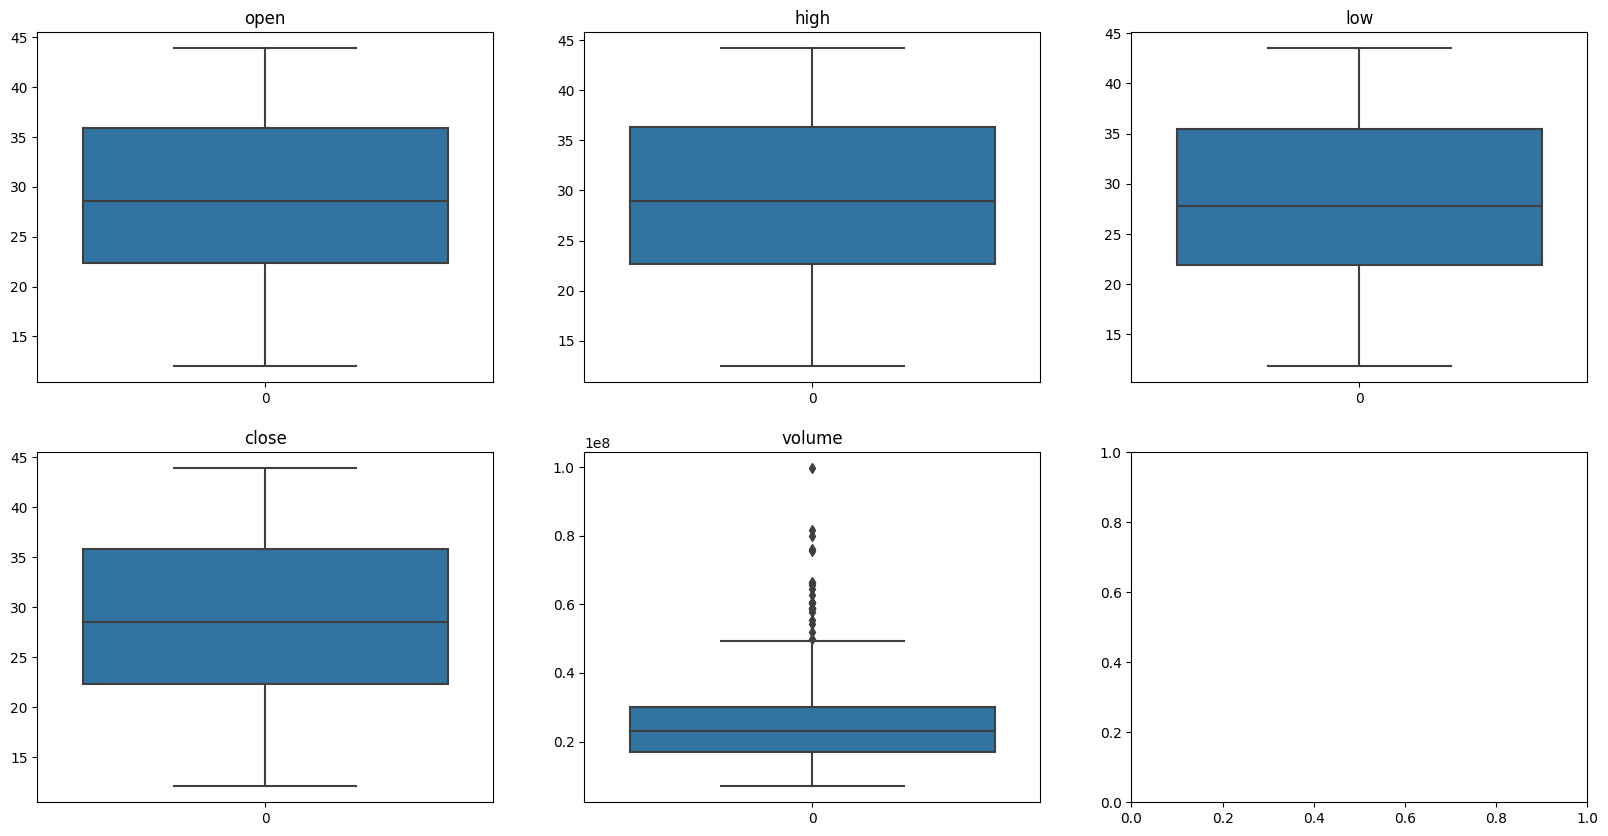

In [34]:
#Biểu đồ boxplot của HPG
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb

# Define the list of attributes
attributes = ['open', 'high', 'low', 'close', 'volume']

# Create subplots for each attribute
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each attribute and plot the boxplot for PDR stock data
for i, attribute in enumerate(attributes):
    row = i // 3  #Calculate the row number
    col = i % 3   # Calculate the column number
    sb.boxplot(df_hpg[attribute], ax=axs[row, col])   # Plot the distribution on the corresponding subplot
    axs[row, col].set_title(attribute)

plt.show()

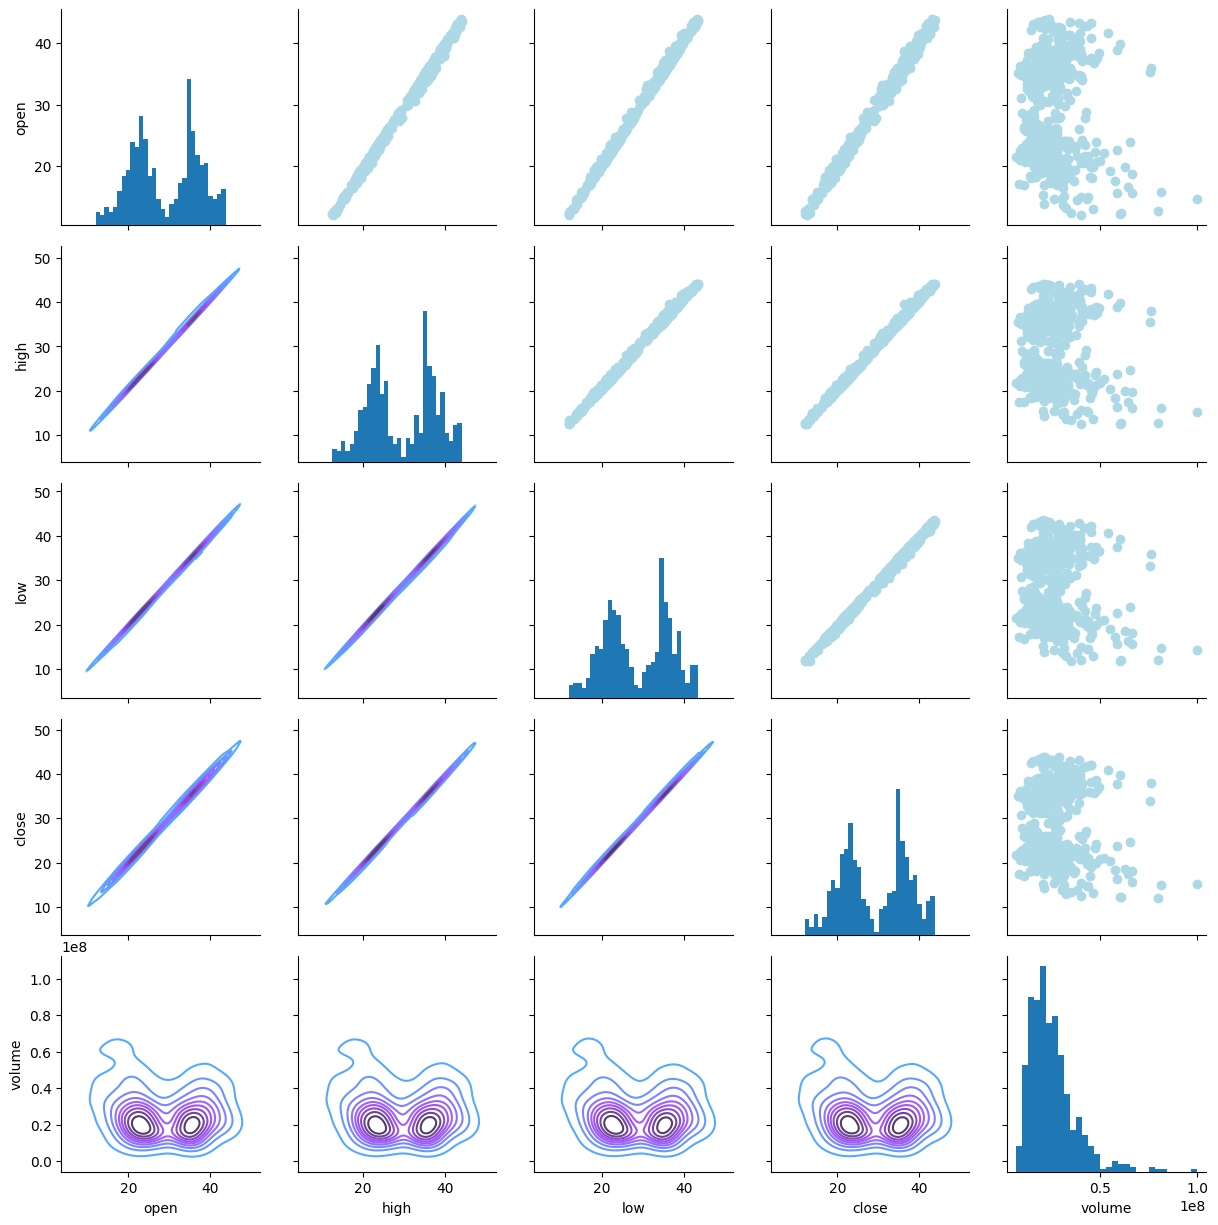

In [35]:
import seaborn as sns
# Create a pair grid of the data using Seaborn
df_plot=sns.PairGrid(df_hpg.dropna())
df_plot.map_upper(plt.scatter, color='lightblue')
df_plot.map_lower(sns.kdeplot, cmap='cool_d')
df_plot.map_diag(plt.hist, bins=30)

Vẽ biểu đồ giá đóng cửa và dự báo giá đóng cửa trong phiên giao dịch tiếp theo của từng mã cổ phiếu đã chọn

Sử dụng vòng lặp để hiển thị giá đóng cửa của 4 mã cổ phiếu

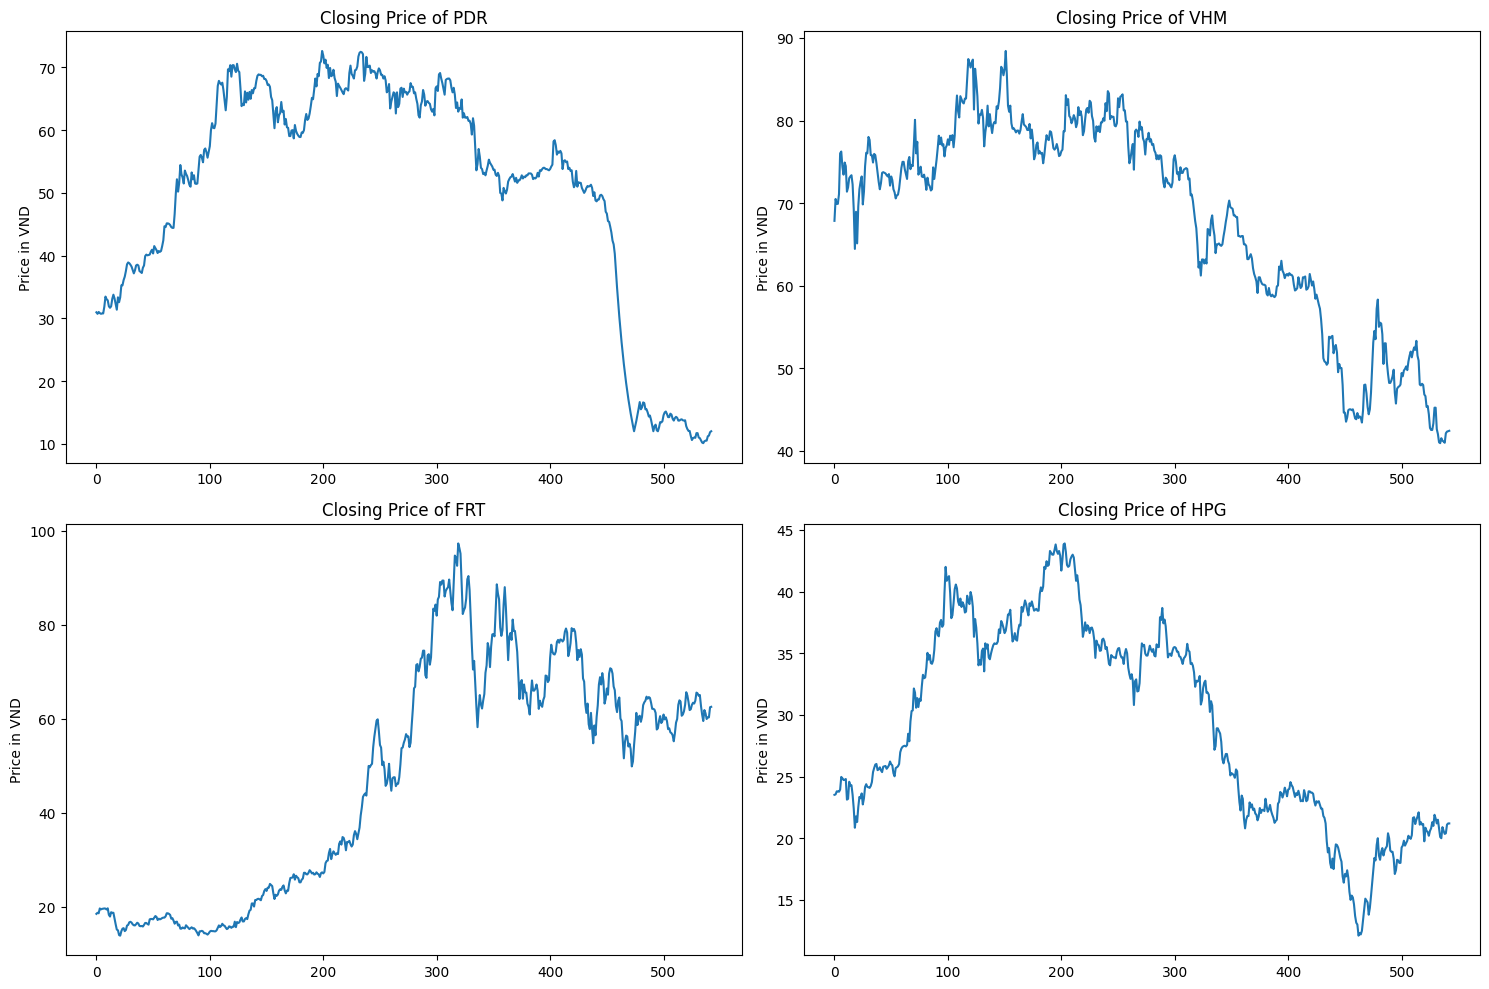

In [36]:
from vnstock import*
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

cyclical_stocks = ['PDR', 'VHM', 'FRT', 'HPG']


for i, company in enumerate(cyclical_stocks, 1):
    data = stock_historical_data(company, "2021-01-01", "2023-03-10")
    data = data['close']
    plt.subplot(2, 2, i)
    plt.plot(data)
    plt.ylabel('Price in VND')
    plt.xlabel(None)
    plt.title(f"Closing Price of {cyclical_stocks[i - 1]}")

plt.tight_layout()
plt.show()


Sau đó tiến hành dự đoán giá đóng cửa cho phiên giao dịch tiếp theo và tính toán các sai số trung bình sao cho các sai số trung bình này đạt được giá trị nhỏ nhất

Sử dụng mô hình hồi quy tuyến tính LinearRegression để dự báo giá đóng cửa trong phiên giao dịch tiếp theo

Đầu tiên là mô hình dựa báo giá đóng cửa của cổ phiếu 'PDR'

Xử lí dữ liệu cổ phiếu PDR và lưu trữ giá đóng cửa vào trong dataframe

In [37]:
ticker ='PDR'
df_pdr = stock_historical_data("PDR", "2021-01-01", "2023-03-10")[['close']]
df = pd.DataFrame(df_pdr)


Thêm giá trị trung bình động của 9 phiên giao dịch vào dataframe df_pdr bằng cách sử dụng hàm rolling() để tính toán giá trung bình động và lưu vào cột mới có tên là Rolling Mean

In [38]:
rolling_mean = df_pdr['close'].rolling(window=9).mean() 
df_pdr['Rolling Mean'] = rolling_mean

Lưu giá đóng cửa và giá trung bình động vào một dataframe mới có tên là df, và loại bỏ các giá trị null bằng hàm dropna().

In [39]:
df = pd.DataFrame(df_pdr[['close', 'Rolling Mean']].dropna())

Chia dữ liệu thành tập huấn luyện và kiểm tra với tỷ lệ 86:14 bằng cách sử dụng hàm int() để tính toán kích thước tập huấn luyện, sau đó sử dụng toán tử slicing để chia dữ liệu thành hai phần.

In [40]:
train_size = int(len(df) * 0.86)
train_data, test_data = df[:train_size], df[train_size:]

Chuẩn hóa dữ liệu sử dụng MinMaxScaler để đưa giá trị dữ liệu về khoảng (0,1), điều này giúp cho mô hình dễ dàng học được các đặc trưng và tăng tính ổn định cho mô hình.

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


Chia dữ liệu thành các đặc trưng đầu vào (x) và biến đầu ra (y) bằng cách sử dụng toán tử slicing.

In [42]:
x_train, y_train = train_data[:-1], train_data[1:]
x_test, y_test = test_data[:-1], test_data[1:]

Sử dụng mô hình hồi quy tuyến tính từ thư viện sklearn để huấn luyện trên tập huấn luyện bằng hàm fit(). Sau đó dự đoán trên tập kiểm tra bằng hàm predict()

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Khai báo thư viện sklearn.metrics để tính toán các sai số trung bình tuyệt đối RMSE, MAE, MAPE. Nhóm ưu tiên đánh giá độ hiệu quả của mô hình thông qua sai số RMSE. Tính toán RMSE bằng hàm mean_squared_error() và tính toán MAE và MAPE bằng hàm mean_absolute_error() và mean_absolute_percentage_error()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)


RMSE: 0.008007298802517153
MAE: 0.005507584017072291
MAPE: 0.04697192279188632


Dự đoán giá đóng cửa của PDR trong phiên giao dịch tiếp theo bằng cách sử dụng mô hình và giá trị đóng cửa và giá trung bình động của phiên giao dịch hiện tại.

In [45]:
last_close_price = df["close"].iloc[-1]
last_rolling_mean = df["Rolling Mean"].iloc[-1]
next_close_price = model.predict(scaler.transform([[last_close_price, last_rolling_mean]]))

print("Predicted closing price of PDR:", scaler.inverse_transform(next_close_price)[0][0])


Predicted closing price of PDR: 12.099541647842663


Chuyển đổi kết quả dự đo và sau đó vẽ biểu đồ trực quan giá dự báo và giá đóng cửa của PDR

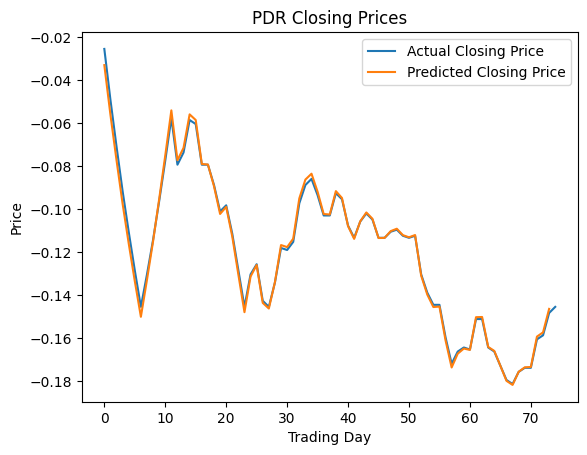

In [46]:
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

plt.plot(test_data[:, 0], label='Actual Closing Price')
plt.plot(y_pred[:, 0], label='Predicted Closing Price')
plt.title('PDR Closing Prices')
plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Sử dụng mô hình tương tự để dự đoán giá đóng cửa của 'VHM' trong phiên giao dịch kế tiếp

RMSE: 0.029641909940119116
MAE: 0.016908986811440745
MAPE: 0.14725683147954977
Giá đóng cửa của VHM trong phiên giao dịch kế tiếp: 42.472608771287405


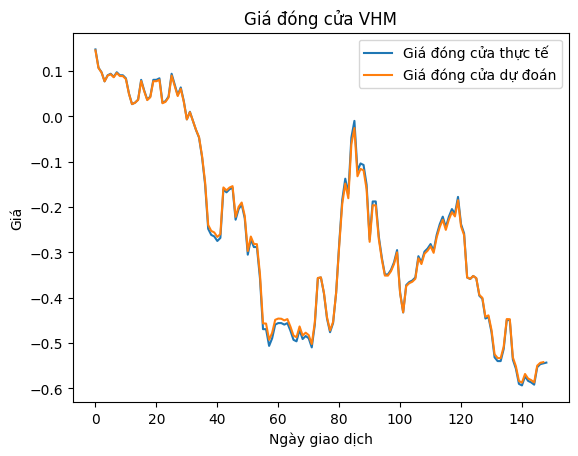

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

#Tải dữ liệu lịch sử cho VHM và lưu giá đóng cửa vào một dataframe
ticker ='VHM'
df_vhm = stock_historical_data("VHM", "2021-01-01", "2023-03-10")

#Thêm giá trị trung bình động trong 50 phiên giao dịch vào dataframe
rolling_mean = df_vhm['close'].rolling(window=50).mean()
df_vhm['Rolling Mean'] = rolling_mean

#Lưu giá đóng cửa và giá trung bình động vào một dataframe mới
df = pd.DataFrame(df_vhm[['close', 'Rolling Mean']].dropna())

#Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

#Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#Chia dữ liệu thành X (đặc trưng đầu vào) và y (biến đầu ra)
x_train, y_train = train_data[:-1], train_data[1:]
x_test, y_test = test_data[:-1], test_data[1:]

#Huấn luyện một mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

#Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

#Tính RMSE, MAE, MAPE trên tập kiểm tra
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

#Dự đoán giá đóng cửa của VHM trong phiên giao dịch kế tiếp
last_close_price = df["close"].iloc[-1]
last_rolling_mean = df["Rolling Mean"].iloc[-1]
next_close_price = model.predict(scaler.transform([[last_close_price, last_rolling_mean]]))

print("Giá đóng cửa của VHM trong phiên giao dịch kế tiếp:", scaler.inverse_transform(next_close_price)[0][0])

#Chuyển đổi dự đoán trở lại tỷ lệ ban đầu
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

#Vẽ biểu đồ giá đóng cửa dự đoán và thực tế
plt.plot(test_data[:, 0], label='Giá đóng cửa thực tế')
plt.plot(y_pred[:, 0], label='Giá đóng cửa dự đoán')
plt.title('Giá đóng cửa VHM')
plt.xlabel('Ngày giao dịch')
plt.ylabel('Giá')
plt.legend()
plt.show()

Tiếp tục tương tự cho việc dự đoán cổ phiếu 'FRT'

RMSE: 0.010915034483014209
MAE: 0.006678029945076592
MAPE: 0.011332634933183382
Next closing price of FRT: 62.56536618706621


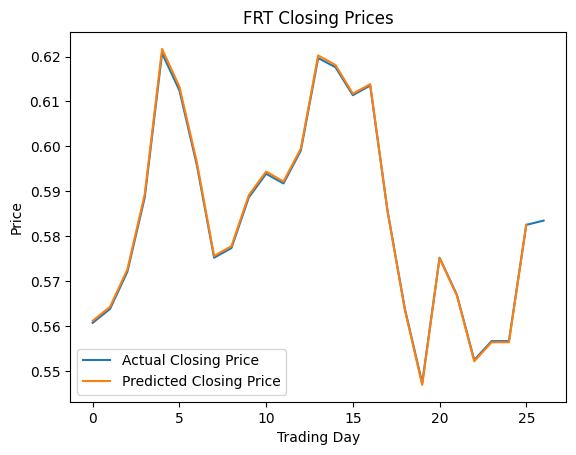

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import Ridge


#Tải dữ liệu lịch sử cho FRT và lưu giá đóng cửa vào một dataframe
ticker ='FRT'
df_frt = stock_historical_data(ticker, "2021-01-01", "2023-03-10")

#Thêm giá trị trung bình động trong 22 phiên giao dịch vào dataframe
rolling_mean = df_frt['close'].rolling(window=22).mean()
df_frt['Rolling Mean'] = rolling_mean

#Lưu giá đóng cửa và giá trung bình động vào một dataframe mới
df = pd.DataFrame(df_frt[['close', 'Rolling Mean']].dropna())

#Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df) * 0.95)
train_data, test_data = df[:train_size], df[train_size:]

#Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#Chia dữ liệu thành X (đặc trưng đầu vào) và y (biến đầu ra)
x_train, y_train = train_data[:-1], train_data[1:]
x_test, y_test = test_data[:-1], test_data[1:]

#Huấn luyện một mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

#Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

#Tính RMSE, MAE, MAPE trên tập kiểm tra
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

#Dự đoán giá đóng cửa của FRT trong phiên giao dịch kế tiếp
last_close_price = df["close"].iloc[-1]
last_rolling_mean = df["Rolling Mean"].iloc[-1]
next_close_price = model.predict(scaler.transform([[last_close_price, last_rolling_mean]]))

print("Next closing price of FRT:", scaler.inverse_transform(next_close_price)[0][0])

#Chuyển đổi dự đoán trở lại tỷ lệ ban đầu
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

#Vẽ biểu đồ giá đóng cửa dự đoán và thực tế
plt.plot(test_data[:, 0], label='Actual Closing Price')
plt.plot(y_pred[:, 0], label='Predicted Closing Price')
plt.title('FRT Closing Prices')
plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.legend()
plt.show()


###### Và cuối cùng là sử dụng mô hình cho việc dự đoán giá đóng cửa trong phiên giao dịch tiếp theo của cổ phiếu 'HPG'


RMSE: 0.012192507394271631
MAE: 0.007672568110429009
MAPE: 0.02828110422706667
Next closing price of HPG: 21.225606772946602


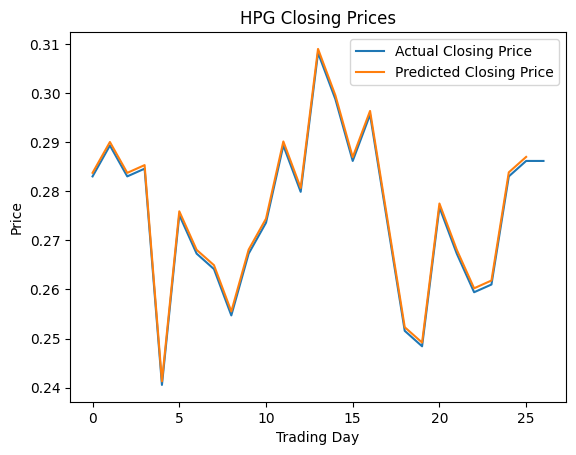

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


#Tải dữ liệu lịch sử cho HPG và lưu giá đóng cửa vào một dataframe
ticker ='HPG'
df_hpg = stock_historical_data("HPG", "2021-01-01", "2023-03-10")

#Thêm giá trị trung bình động trong 8 phiên giao dịch vào dataframe
rolling_mean = df_hpg['close'].rolling(window=8).mean()
df_hpg['Rolling Mean'] = rolling_mean

#Lưu giá đóng cửa và giá trung bình động vào một dataframe mới
df = pd.DataFrame(df_hpg[['close', 'Rolling Mean']].dropna())

#Chia dữ liệu thành tập huấn luyện và kiểm tra
train_size = int(len(df) * 0.95)
train_data, test_data = df[:train_size], df[train_size:]

#Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#Chia dữ liệu thành X (đặc trưng đầu vào) và y (biến đầu ra)
x_train, y_train = train_data[:-1], train_data[1:]
x_test, y_test = test_data[:-1], test_data[1:]

#Huấn luyện một mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

#Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

#Tính RMSE, MAE, MAPE trên tập kiểm tra
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

#Dự đoán giá đóng cửa của HPG trong phiên giao dịch kế tiếp
last_close_price = df["close"].iloc[-1]
last_rolling_mean = df["Rolling Mean"].iloc[-1]
next_close_price = model.predict(scaler.transform([[last_close_price, last_rolling_mean]]))

print("Next closing price of HPG:", scaler.inverse_transform(next_close_price)[0][0])

#Chuyển đổi dự đoán trở lại tỷ lệ ban đầu
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test)

#Vẽ biểu đồ giá đóng cửa dự đoán và thực tế
plt.plot(test_data[:, 0], label='Actual Closing Price')
plt.plot(y_pred[:, 0], label='Predicted Closing Price')
plt.title('HPG Closing Prices')
plt.xlabel('Trading Day')
plt.ylabel('Price')
plt.legend()
plt.show()

Nhận xét về sự phù hợp của mô hình LinearRegression trong việc dự báo giá đóng cửa ở phiên giao dịch tiếp theo của 4 mã cổ phiếu 'PDR', 'VHM', 'FRT', 'HPG' thông qua các sai số trung bình tuyệt đối RMSE, MAE, MAPE

PDR:
- RMSE và MAE đều cho biết độ lỗi trung bình giữa dự đoán và giá thực tế của mô hình Linear Regression là khá thấp. đặc biệt là MAPE chỉ 0.047, cho thấy mô hình dự báo có độ chính xác cao.

VHM:
- Đối với VHM, các sai số trung bình tuyệt đối đều lớn hơn đáng kể so với PDR, đặc biệt là MAPE là 0.147, cho thấy mô hình dự báo có độ chính xác thấp hơn đáng kể.

FRT:
- Đối với FRT, các sai số trung bình tuyệt đối đều thấp, đặc biệt là MAPE chỉ 0.011, cho thấy mô hình dự báo có độ chính xác cao.

HPG:
-  RMSE và MAE đều rất thấp, chỉ khoảng 1-2% so với giá trị thực tế, và MAPE chỉ khoảng 2,7%. Điều này cho thấy mô hình có thể dự đoán giá của HPG với độ chính xác cao.

                                                -Tài liệu tham khảo-

- ChatGPT
- https://www.kaggle.com/code/chandanchaudhari/linear-regression-analysis-with-ridge-and-lasso
- https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook#6.-Predicting-the-closing-price-stock-price-of-APPLE-inc:
- https://github.com/trinhkiet0105/Stock-Prediction/blob/main/stock.py
- https://github.com/thinh-vu/vnstock/blob/main/vnstock_demo_index_all_functions_testing_2023_03_25.ipynb